## Task 1 - Data Preparation

Need to compile all the data from the 2016-2020 periods into one series

In [1]:
import pandas as pd

# Empty list to store individual dataframes.
dfs = []

#Read the 5 datafiles
bikesix = pd.read_csv("bike-ped-auto-counts-2016.csv")

bikeseven = pd.read_csv("bike-ped-auto-counts-2017.csv")

bikeeight = pd.read_csv("bike-ped-auto-counts-2018.csv")

bikenine = pd.read_csv("bike-ped-auto-counts-2019.csv")

#Rename the variables to Bicentennial Bikeway Cyclists and Bicentennial Bikeway Pedestrians
bikenine = bikenine.rename(columns={'A019 ,Bicentennial Bikeway, Milton ,Cyclists': 'Bicentennial Bikeway Cyclists'})
bikenine = bikenine.rename(columns={'A019 ,Bicentennial Bikeway, Milton ,Pedestrians': 'Bicentennial Bikeway Pedestrians'})

biketwenty = pd.read_csv("bike-ped-auto-counts-2020.csv")

#Rename the 'Time' variable in the 2020 dataset to 'Date'
biketwenty = biketwenty.rename(columns={'Time': 'Date'})
#Rename the variables to Bicentennial Bikeway Cyclists and Bicentennial Bikeway Pedestrians
biketwenty = biketwenty.rename(columns={'A019, Bicentennial Bikeway, Milton Cyclist': 'Bicentennial Bikeway Cyclists'})
biketwenty = biketwenty.rename(columns={'A019, Bicentennial Bikeway, Milton Pedestrian': 'Bicentennial Bikeway Pedestrians'})


In [2]:
#Combine the Inbound and Outbound columns into one column for relevant datasets
bikesix['Bicentennial Bikeway Cyclists'] = bikesix['Bicentennial Bikeway Cyclists Inbound'] + bikesix['Bicentennial Bikeway Cyclists Outbound']

bikeseven['Bicentennial Bikeway Cyclists'] = bikeseven['Bicentennial Bikeway Cyclists Inbound'] + bikeseven['Bicentennial Bikeway Cyclists Outbound']

bikeeight['Bicentennial Bikeway Cyclists'] = bikeeight['Bicentennial Bikeway Cyclists Inbound'] + bikeeight['Bicentennial Bikeway Cyclists Outbound']


For this dataset, the exogenous (external) variable that may influence the outcome of the Bicentennial Bikeway Cyclists traffic will be Bicentennial Bikeway Pedestrians variable. This will be done to capture if this variable has any external influence on the primary data which in this case is the amount of traffic from the cyclists in the Bicentennial Bikeway. For the dataset for the earlier years, the pedestrian data was split into inbound and outbound, they will be needed to combine together so they can be merged into the dataframe appropriately.

In [3]:
#Combine the Inbound and Outbound into one column for the pedestrains for relevant data
bikesix['Bicentennial Bikeway Pedestrians'] = bikesix['Bicentennial Bikeway Pedestrians Inbound'] + bikesix['Bicentennial Bikeway Pedestrians Outbound']

bikeseven['Bicentennial Bikeway Pedestrians'] = bikeseven['Bicentennial Bikeway Pedestrians Inbound'] + bikeseven['Bicentennial Bikeway Pedestrians Outbound']

bikeeight['Bicentennial Bikeway Pedestrians'] = bikeeight['Bicentennial Bikeway Pedestrians Inbound'] + bikeeight['Bicentennial Bikeway Pedestrians Outbound']


In [4]:
#Include relevant columns and append to the dfs dataframe
bikesix = bikesix[['Date', 'Bicentennial Bikeway Cyclists', 'Bicentennial Bikeway Pedestrians']]

dfs.append(bikesix)

bikeseven = bikeseven[['Date', 'Bicentennial Bikeway Cyclists', 'Bicentennial Bikeway Pedestrians']]

dfs.append(bikeseven)

bikeeight = bikeeight[['Date', 'Bicentennial Bikeway Cyclists', 'Bicentennial Bikeway Pedestrians']]

dfs.append(bikeeight)

bikenine = bikenine[['Date', 'Bicentennial Bikeway Cyclists', 'Bicentennial Bikeway Pedestrians']]

dfs.append(bikenine)

biketwenty = biketwenty[['Date', 'Bicentennial Bikeway Cyclists', 'Bicentennial Bikeway Pedestrians']]

dfs.append(biketwenty)


In [5]:
dfs

[           Date  Bicentennial Bikeway Cyclists  \
 0     1/01/2016                         1785.0   
 1     2/01/2016                         2556.0   
 2     3/01/2016                         2059.0   
 3     4/01/2016                         2052.0   
 4     5/01/2016                          626.0   
 ..          ...                            ...   
 361  27/12/2016                         2279.0   
 362  28/12/2016                         2453.0   
 363  29/12/2016                         2497.0   
 364  30/12/2016                         2166.0   
 365  31/12/2016                         2012.0   
 
      Bicentennial Bikeway Pedestrians  
 0                              1107.0  
 1                              1108.0  
 2                              1101.0  
 3                               762.0  
 4                               365.0  
 ..                                ...  
 361                            1151.0  
 362                            1155.0  
 363             

In [6]:
merged_df = pd.concat(dfs, ignore_index=True)


#Convert the 'merged_df' into a csv file
merged_df.to_csv('merged_data.csv', index=False)

In [7]:
del merged_df

In [8]:
#load the data
bdf = pd.read_csv('merged_data.csv')

# Display first five rows of the data
bdf.head(5)

Date  Bicentennial Bikeway Cyclists  Bicentennial Bikeway Pedestrians
0  1/01/2016                         1785.0                            1107.0
1  2/01/2016                         2556.0                            1108.0
2  3/01/2016                         2059.0                            1101.0
3  4/01/2016                         2052.0                             762.0
4  5/01/2016                          626.0                             365.0

As seen above, the resulting dataframe has columns 'Date', 'Bicentennial Bikeway Cyclists' and the exogenous variable 'Bicentennial Bikeway Pedestrians'.

In [9]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              1827 non-null   object 
 1   Bicentennial Bikeway Cyclists     1732 non-null   float64
 2   Bicentennial Bikeway Pedestrians  1732 non-null   float64
dtypes: float64(2), object(1)
memory usage: 42.9+ KB


An index will now be setup for the dataset to allow for timeseries analysis.

In [10]:
#Set index for the dataframe
bdf = bdf.set_index(['Date'])

In [11]:
# modify Datetime index datatype from 'object' to 'datatime64[ns]'
bdf.index = pd.to_datetime(bdf.index, format='mixed', dayfirst=True)
bdf.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1827, freq=None)

The reason for using the 'Bicentennial Bikeway Pedestrian' as the useful side information is because the relationship between the pedestrian traffic may impact the traffic of the cyclists and vice-versa. It may provide as an external factor to the primary data.

## Task 2 - Exploratory Data Analysis (EDA)

To visualise timeseries, it is nessesary to view the entire data and indentify and handle any missing values appropriately.

<Axes: xlabel='Date'>

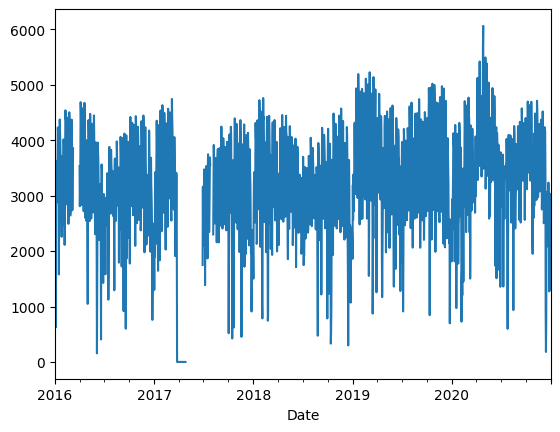

In [12]:
#data for the whole interval for the Cyclists variable
bdf['2016-01-01':'2020-12-31']['Bicentennial Bikeway Cyclists'].plot()

<Axes: xlabel='Date'>

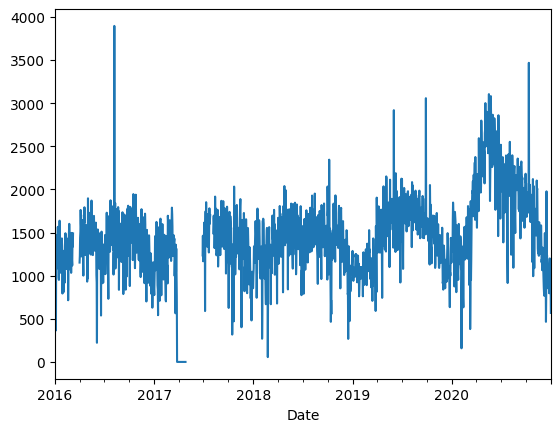

In [13]:
#data for the whole interval for the Pedestrians variable
bdf['2016-01-01':'2020-12-31']['Bicentennial Bikeway Pedestrians'].plot()

Missing values can be identified for both the Cyclists and Pedestrian data for the 2016 and 2017 years. To handle this missing data, interpolation would not fit as the interval for the missing data is too large. Therefore, the best way to handle this missing data will be to use 'predicted' values.

In [14]:
print("Total number of null/missing values:", bdf['Bicentennial Bikeway Cyclists'].isna().sum())
print("Total number of null/missing values:", bdf['Bicentennial Bikeway Pedestrians'].isna().sum())
print("Number of null/missing values in year 2017:", bdf.loc['2017']['Bicentennial Bikeway Cyclists'].isna().sum())

Total number of null/missing values: 95
Total number of null/missing values: 95
Number of null/missing values in year 2017: 72


In [15]:
import numpy as np

# to look at the timestamps which has missing values
s = pd.isnull(bdf['Bicentennial Bikeway Cyclists'])
missing_index = bdf['Bicentennial Bikeway Cyclists'][s]
print("index of missinig values:" ,np.array(missing_index.index))

index of missinig values: ['2016-03-09T00:00:00.000000000' '2016-03-10T00:00:00.000000000'
 '2016-03-11T00:00:00.000000000' '2016-03-12T00:00:00.000000000'
 '2016-03-13T00:00:00.000000000' '2016-03-14T00:00:00.000000000'
 '2016-03-15T00:00:00.000000000' '2016-03-16T00:00:00.000000000'
 '2016-03-17T00:00:00.000000000' '2016-03-18T00:00:00.000000000'
 '2016-03-19T00:00:00.000000000' '2016-03-20T00:00:00.000000000'
 '2016-03-21T00:00:00.000000000' '2016-03-22T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-24T00:00:00.000000000'
 '2016-03-25T00:00:00.000000000' '2016-03-26T00:00:00.000000000'
 '2016-03-27T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-29T00:00:00.000000000' '2016-03-30T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2017-04-27T00:00:00.000000000'
 '2017-04-28T00:00:00.000000000' '2017-04-29T00:00:00.000000000'
 '2017-04-30T00:00:00.000000000' '2017-05-01T00:00:00.000000000'
 '2017-05-02T00:00:00.000000000' '2017-05-03T00:00:00.000000000'

We observe that the missing values occur in years 2016 and 2017 with the majorty of the missing values occuring in 2017.

The interpolation method is not suited to this data, because the missing data interval is so long. Filling the data with a "predicted" values would be a better option here. Using the mean of the 2018 year data to get the best 'predicted' values for the 2016 and 2017 missing values as the 2018 period would be the provide the more similiar and accurate results for prediction than laters years.

<Axes: xlabel='Date'>

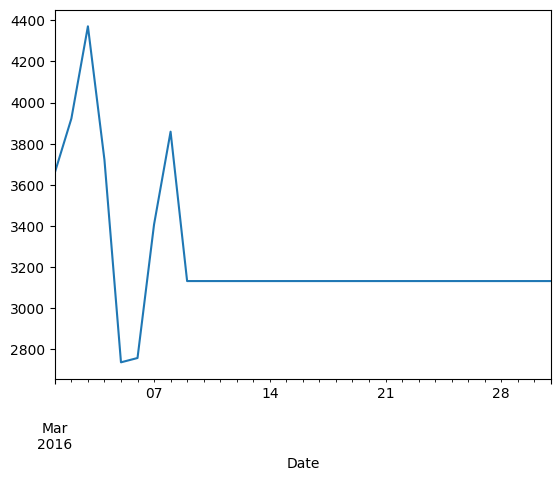

In [16]:
#Since the missing values for the 2016 year are only in the March month
#the mean for the 2018 March will be calculated.

eighteen_mean = bdf['2018-03-01':'2018-03-31']['Bicentennial Bikeway Cyclists'].mean()

bdf['Bicentennial Bikeway Cyclists'].loc['2016'].fillna(eighteen_mean, inplace=True) 
bdf['2016-03-01':'2016-03-31']['Bicentennial Bikeway Cyclists'].plot()

<Axes: xlabel='Date'>

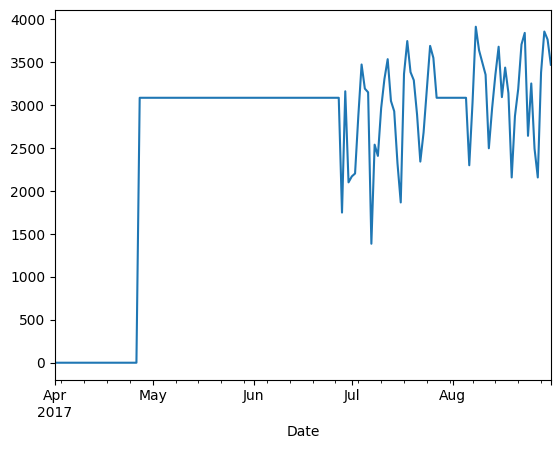

In [17]:
#For the 2017 missing values, these occur in the periods between Apr-Aug. Mean for this time period will be found
#for the 2018 year to fill in the missing values.

eighteen_mean2 = bdf['2018-04-27':'2018-08-05']['Bicentennial Bikeway Cyclists'].mean()

bdf['Bicentennial Bikeway Cyclists'].loc['2017'].fillna(eighteen_mean2, inplace=True) 
bdf['2017-04-01':'2017-08-31']['Bicentennial Bikeway Cyclists'].plot()

Now that the missing values for the Bicentennial Bikeway Cyclists have been filled in, the same process will now be conducted for the Pedestrian series. 

In [18]:
# to look at the timestamps which has missing values
s2 = pd.isnull(bdf['Bicentennial Bikeway Pedestrians'])
missing_index2 = bdf['Bicentennial Bikeway Pedestrians'][s2]
print("index of missinig values:" ,np.array(missing_index2.index))

index of missinig values: ['2016-03-09T00:00:00.000000000' '2016-03-10T00:00:00.000000000'
 '2016-03-11T00:00:00.000000000' '2016-03-12T00:00:00.000000000'
 '2016-03-13T00:00:00.000000000' '2016-03-14T00:00:00.000000000'
 '2016-03-15T00:00:00.000000000' '2016-03-16T00:00:00.000000000'
 '2016-03-17T00:00:00.000000000' '2016-03-18T00:00:00.000000000'
 '2016-03-19T00:00:00.000000000' '2016-03-20T00:00:00.000000000'
 '2016-03-21T00:00:00.000000000' '2016-03-22T00:00:00.000000000'
 '2016-03-23T00:00:00.000000000' '2016-03-24T00:00:00.000000000'
 '2016-03-25T00:00:00.000000000' '2016-03-26T00:00:00.000000000'
 '2016-03-27T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03-29T00:00:00.000000000' '2016-03-30T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2017-04-27T00:00:00.000000000'
 '2017-04-28T00:00:00.000000000' '2017-04-29T00:00:00.000000000'
 '2017-04-30T00:00:00.000000000' '2017-05-01T00:00:00.000000000'
 '2017-05-02T00:00:00.000000000' '2017-05-03T00:00:00.000000000'

In [19]:
#Since the missing values for the 2016 year are only in the March month
#the mean for the 2018 March will be calculated.

eighteen_mean3 = bdf['2018-03-01':'2018-03-31']['Bicentennial Bikeway Pedestrians'].mean()

bdf['Bicentennial Bikeway Pedestrians'].loc['2016'].fillna(eighteen_mean3, inplace=True) 

In [20]:
#For the 2017 missing values, these occur in the periods between Apr-Aug. Mean for this time period will be found
#for the 2018 year to fill in the missing values.

eighteen_mean4 = bdf['2018-04-27':'2018-08-05']['Bicentennial Bikeway Pedestrians'].mean()

bdf['Bicentennial Bikeway Pedestrians'].loc['2017'].fillna(eighteen_mean4, inplace=True) 

Looking at the time series plot, help us in understanding the overall nature  of the data and to indentify outliers or any abnormal points. To look at month,weekly, daily patterns DateTimeIndex provides easier functionality.

In [21]:
bdf['month'] = bdf.index.month_name()
bdf['day_of_week']  = bdf.index.day_name()

Now to visualise the entire data set by creating plots, and find the patterns and trends that can be observed. Visualisations appropriate for uncertainty and correlation where appropriate will also be used.

Text(0.5, 0, 'Date')

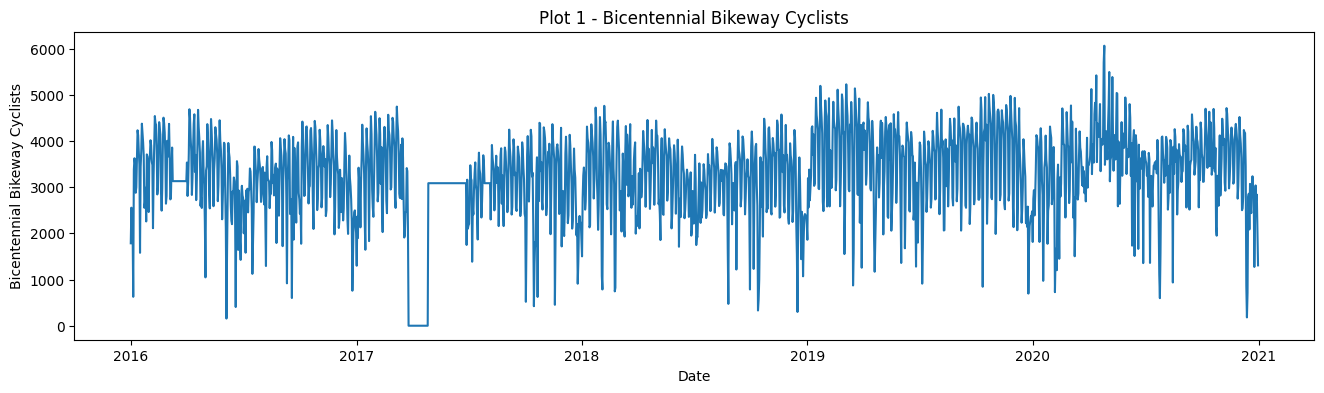

In [22]:
# import matplotlib and seaborn packages for using different plot and aligning them.
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting all the data for entire dataset
plt.figure(figsize=(16,4))
plt.plot(bdf['Bicentennial Bikeway Cyclists'])
plt.title('Plot 1 - Bicentennial Bikeway Cyclists')
plt.ylabel('Bicentennial Bikeway Cyclists')
plt.xlabel('Date')

 There is clear evidence of a seasonality pattern. There is also a long period in 2017 where due to a certain event, the number of cyclists decreased. It can also be identified that the Cyclist numbers are low for time periods around the December/January periods and also the middle months of the year around the June/July months can be identified as lower for all the years of data.  

Text(0, 0.5, 'Bicentennial Bikeway Cyclists')

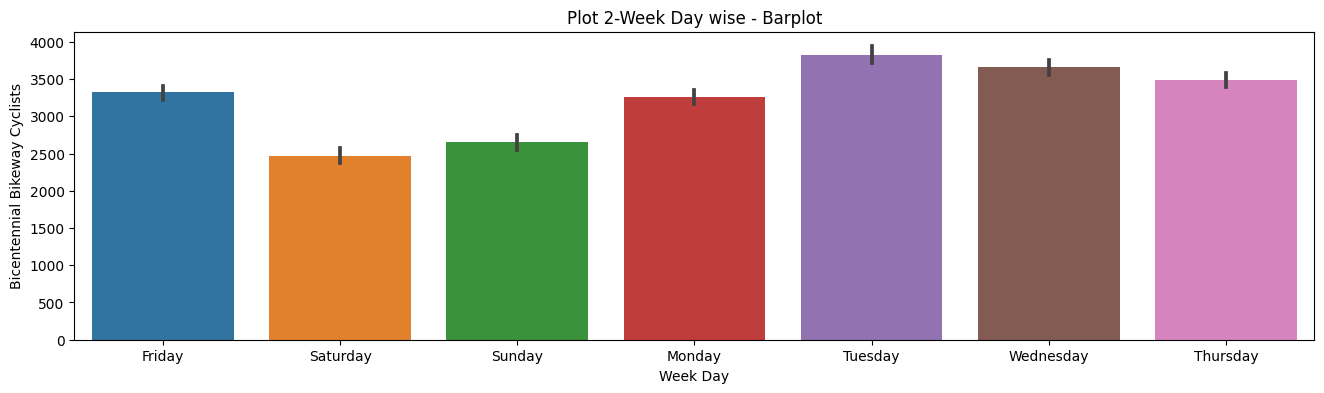

In [23]:
# Barplot to view weekly Cyclist traffic
fig, axes = plt.subplots(1,1,squeeze=False)
fig.set_size_inches(16,4)
sns.barplot(data=bdf, x='day_of_week', y=bdf['Bicentennial Bikeway Cyclists'],ax=axes[0,0])
axes[0,0].set_title("Plot 2-Week Day wise - Barplot")
axes[0,0].set_xlabel('Week Day')
axes[0,0].set_ylabel('Bicentennial Bikeway Cyclists')

Text(0, 0.5, 'Bicentennial Bikeway Cyclists')

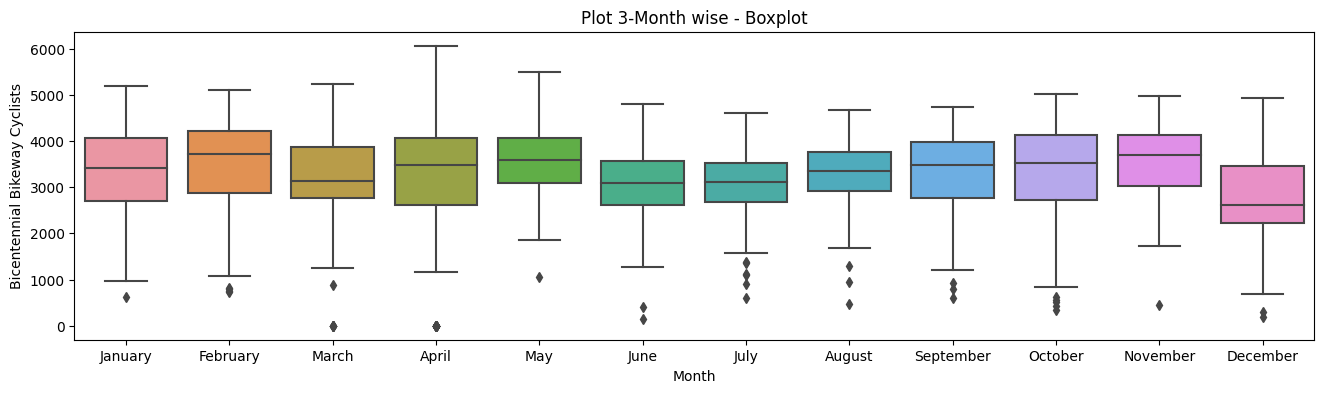

In [24]:
# Boxplot to view monthly Cyclist Traffic
fig, ax = plt.subplots(figsize=(16,4))
sns.boxplot(data=bdf, x='month', y=bdf['Bicentennial Bikeway Cyclists'], ax = ax)
ax.set_title("Plot 3-Month wise - Boxplot")
ax.set_xlabel('Month')
ax.set_ylabel('Bicentennial Bikeway Cyclists')

Text(0.5, 1.0, 'Plot 4-Box and Whisker Plot')

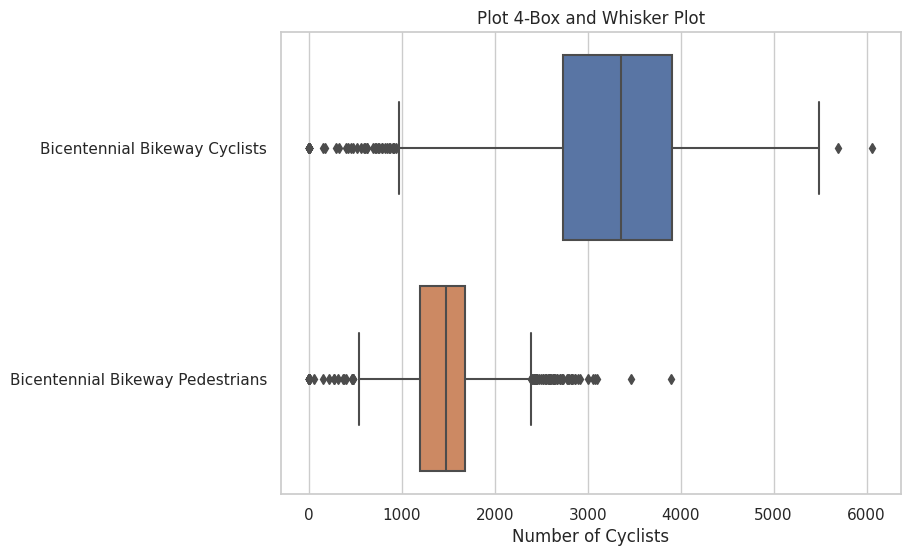

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=bdf, orient="h")

plt.xlabel("Number of Cyclists")
plt.title("Plot 4-Box and Whisker Plot")

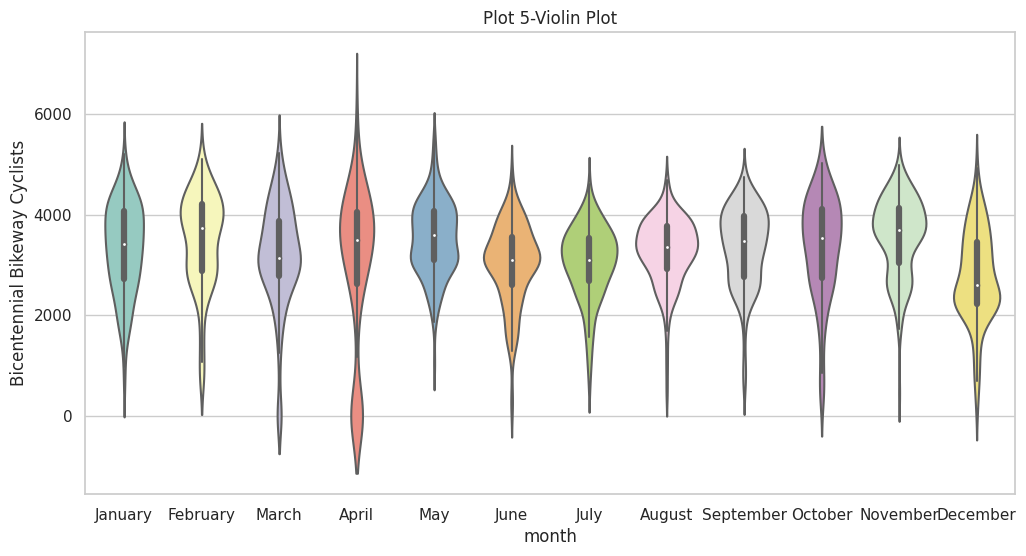

In [26]:
plt.figure(figsize=(12, 6)) 
sns.violinplot(x="month", y="Bicentennial Bikeway Cyclists", data=bdf, palette="Set3")
plt.title("Plot 5-Violin Plot")
plt.show()

Observations from the timeseries plots:
- Plot 1: Shows the entire Cyclist traffic for the entire time period between 2016-2020. Some seasonal patterns can be identified as some months for every year have a lower number of cyclists present, however plots which look into the montly trends will be needed to establish a pattern. An observation from this plot is that in the 2017 year there can be seen that there is a significant downward step-change due to some external factor or event.

- Plot 2: This barplot shows the average cyclists per day for a week. It is clear that on weekend, the number of cyclists is less when compared to the weekdays. The day with the highest traffic is Tuesday.

- Plot 3: Plot 3 shows a month-wise boxplot for the entire dataset. A wave type pattern can be identified where the traffic peaks around the Feb-May months, the dips for the June-Aug months and then peaks again for the Sep-Nov months and then hits a low in the December month. This can be indentified as a seasonality trend. It can also be identified that there seem to be more outliers lower than the mean.

Visualisations for uncertainty and correlation were shown through Plot 4 and 5.
- These plots identified that the for the cyclists data had more outliers towards the lower end values as they were outside the interquartile range. However there are a couple identified towards the higher end too, whereas the outliers for the pedestrian data seems to be more spread out. Plot 5 shows that month of April for the Cyclist data had the most variance. 

Outliers observed: 

We do observe some outliers in the plot 4-boxplot and plot5-violinplot. 

Here outliers seen in the boxplot are all within reason and need to be kept as the possible reasons are external events and possible pedestrian traffic playing a factor.

## Task 3 - Cyclist traffic on the Bicentennial Bikeway, Milton

Split the data into training and testing series, selecting the testing series to be the
last three months of the data.

In [27]:
# Calculate the date three months ago from the last date in the DataFrame
end_date = bdf.index[-1]
start_date = end_date - pd.DateOffset(months=3)

start_date = start_date + pd.DateOffset(days=1)

#Split the data into training and testing series, with the last 3 months of data being the testing
training_data = bdf[bdf.index < start_date]
testing_data = bdf[start_date:end_date]

In [28]:
training_data.tail()

Bicentennial Bikeway Cyclists  Bicentennial Bikeway Pedestrians  \
Date                                                                          
2020-09-26                         2563.0                            1629.0   
2020-09-27                         3379.0                            2011.0   
2020-09-28                         3153.0                            2100.0   
2020-09-29                         4401.0                            2182.0   
2020-09-30                         4246.0                            2074.0   

                month day_of_week  
Date                               
2020-09-26  September    Saturday  
2020-09-27  September      Sunday  
2020-09-28  September      Monday  
2020-09-29  September     Tuesday  
2020-09-30  September   Wednesday

In [29]:
testing_data

Bicentennial Bikeway Cyclists  Bicentennial Bikeway Pedestrians  \
Date                                                                          
2020-10-01                         3722.0                            2071.0   
2020-10-02                         3629.0                            1740.0   
2020-10-03                         3115.0                            1682.0   
2020-10-04                         3120.0                            1948.0   
2020-10-05                         3491.0                            1888.0   
...                                   ...                               ...   
2020-12-27                         3038.0                            1200.0   
2020-12-28                         2711.0                             970.0   
2020-12-29                         2839.0                             919.0   
2020-12-30                         2081.0                            1013.0   
2020-12-31                         1307.0                             568.0   

               month day_of_week  
Date                              
2020-10-01   October    Thursday  
2020-10-02   October      Friday  
2020-10-03   October    Saturday  
2020-10-04   October      Sunday  
2020-10-05   October      Monday  
...              ...         ...  
2020-12-27  December      Sunday  
2020-12-28  December      Monday  
2020-12-29  December     Tuesday  
2020-12-30  December   Wednesday  
2020-12-31  December    Thursday  

[92 rows x 4 columns]

In [30]:
bdf

Bicentennial Bikeway Cyclists  Bicentennial Bikeway Pedestrians  \
Date                                                                          
2016-01-01                         1785.0                            1107.0   
2016-01-02                         2556.0                            1108.0   
2016-01-03                         2059.0                            1101.0   
2016-01-04                         2052.0                             762.0   
2016-01-05                          626.0                             365.0   
...                                   ...                               ...   
2020-12-27                         3038.0                            1200.0   
2020-12-28                         2711.0                             970.0   
2020-12-29                         2839.0                             919.0   
2020-12-30                         2081.0                            1013.0   
2020-12-31                         1307.0                             568.0   

               month day_of_week  
Date                              
2016-01-01   January      Friday  
2016-01-02   January    Saturday  
2016-01-03   January      Sunday  
2016-01-04   January      Monday  
2016-01-05   January     Tuesday  
...              ...         ...  
2020-12-27  December      Sunday  
2020-12-28  December      Monday  
2020-12-29  December     Tuesday  
2020-12-30  December   Wednesday  
2020-12-31  December    Thursday  

[1827 rows x 4 columns]

Now the STR - Seasonal-Trend-Residual decomoposition will be conducted on the training data in order to visualise and interpret each of the components of the STR decomposition for cycle traffic.

The decomposition is achieved using the following steps:
1. Isolate the trend-cycle component
2. Calculate the de-trended series
3. Estimate the seasonal component
4. Calculate the residual component
Then we estimate a model of the trend, and combine this with the estimate of seasonality to make predictions. 

In [31]:
bdf.index.dtype

dtype('<M8[ns]')

In [32]:
# Construct new df
df_temp = pd.DataFrame(training_data['Bicentennial Bikeway Cyclists'])

# rename the Bicentennial Bikeway Cyclists column
df_temp.rename(columns = {'Bicentennial Bikeway Cyclists':'Cyclists'}, inplace = True)

# have to re-cast the index as a datetime object
df_temp.index = df_temp.index.astype('datetime64[ns]')

# Resample Cyclists to daily observations
df_temp = df_temp.resample('1D').mean()
df_temp.tail(6)

Cyclists
Date                
2020-09-25    3807.0
2020-09-26    2563.0
2020-09-27    3379.0
2020-09-28    3153.0
2020-09-29    4401.0
2020-09-30    4246.0

In [33]:
#Do the same for the testing_data

df_test = pd.DataFrame(testing_data['Bicentennial Bikeway Cyclists'])

# rename the Bicentennial Bikeway Cyclists column
df_test.rename(columns = {'Bicentennial Bikeway Cyclists':'Cyclists'}, inplace = True)

# have to re-cast the index as a datetime object
df_test.index = df_test.index.astype('datetime64[ns]')

# Resample Cyclists to daily observations
df_test = df_test.resample('1D').mean()
df_test.tail(6)

Cyclists
Date                
2020-12-26    2236.0
2020-12-27    3038.0
2020-12-28    2711.0
2020-12-29    2839.0
2020-12-30    2081.0
2020-12-31    1307.0

<Axes: xlabel='Date'>

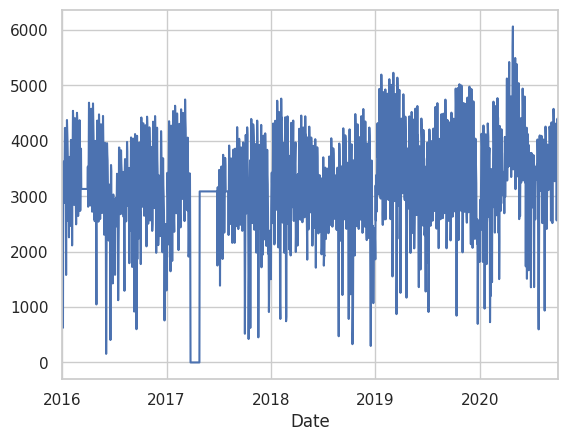

In [34]:
df_temp['Cyclists'].plot()

In order to validate the output of your manual process the automated modelling approach will be generated.

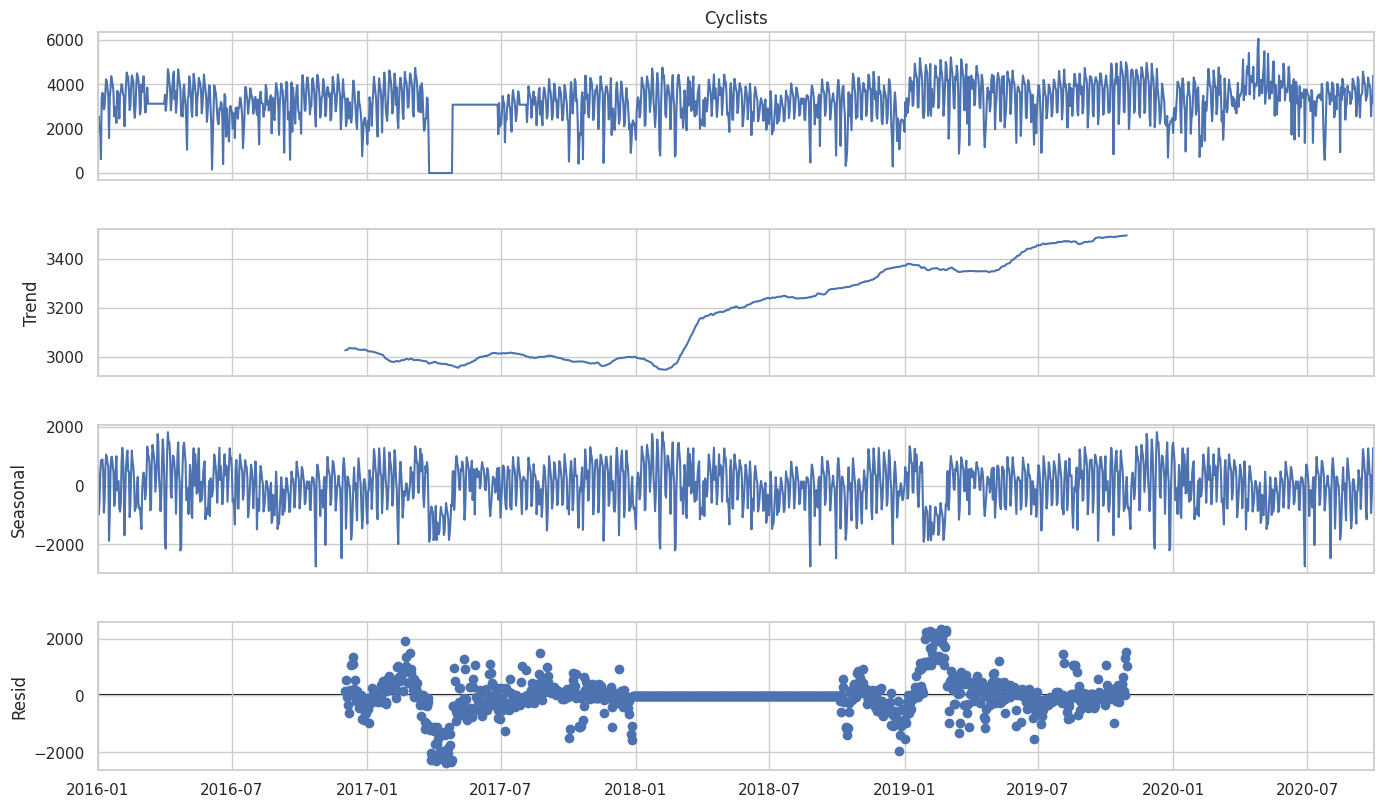

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

str_res = seasonal_decompose(df_temp['Cyclists'],period = (7*24*4))
fig = str_res.plot()
fig.set_size_inches((16, 9))

The above automated modelling approach shows the STR decomposition. The trend component represents the long-term gradual changes in the data. Seasonal component represents the regular repeating patterns or fluctuations that appear in the data at fixed intervals. Finally the residual component represents the unexplained or random variations in the data that are not attributed to the trend or seasonal component.

### Isolate the trend

<Axes: xlabel='Date'>

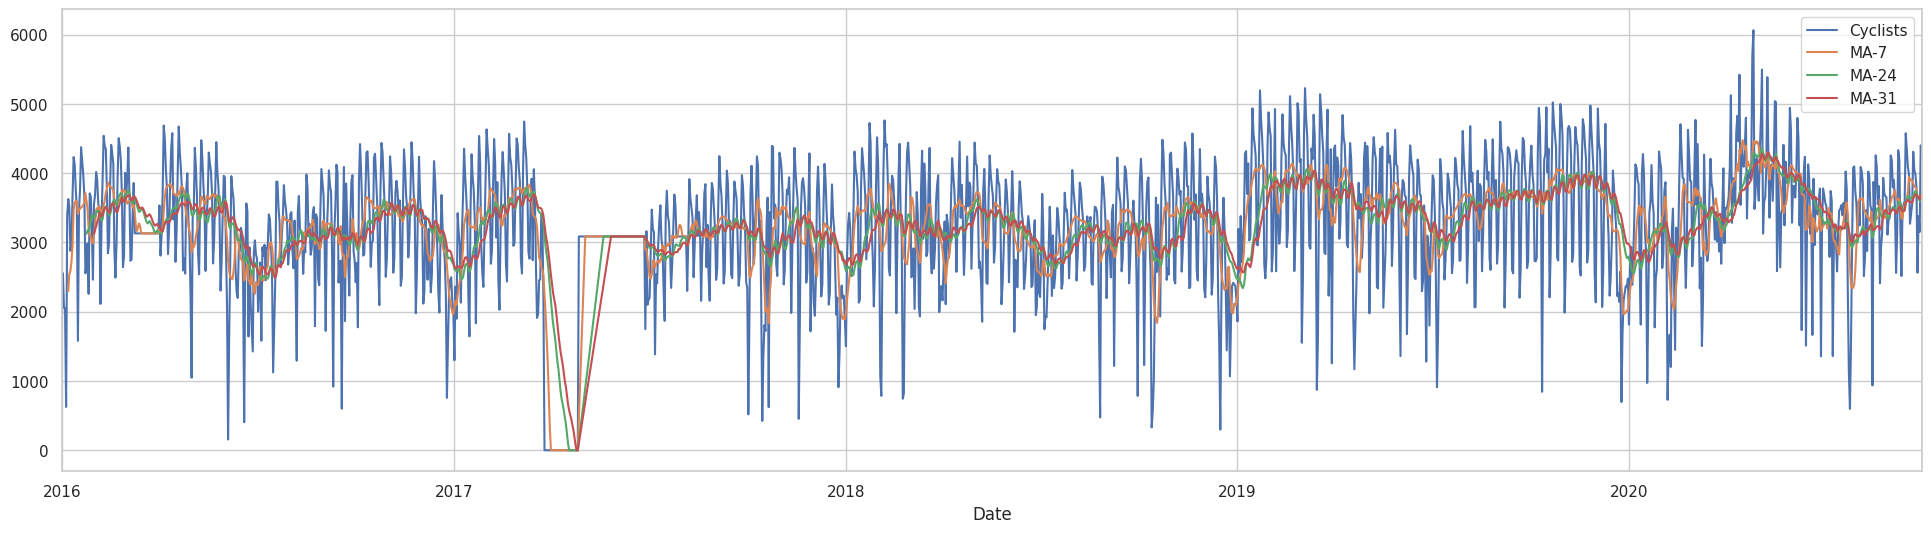

In [36]:
df_temp['MA-7'] = df_temp['Cyclists'].rolling(7).mean()
df_temp['MA-24'] = df_temp['Cyclists'].rolling(24).mean()
df_temp['MA-31'] = df_temp['Cyclists'].rolling(31).mean()
df_temp[['Cyclists', 'MA-7', 'MA-24','MA-31']].plot(figsize=(24,6))

The trend component for the MA-31 above is very similiar to the automated model.  

<Axes: xlabel='Date'>

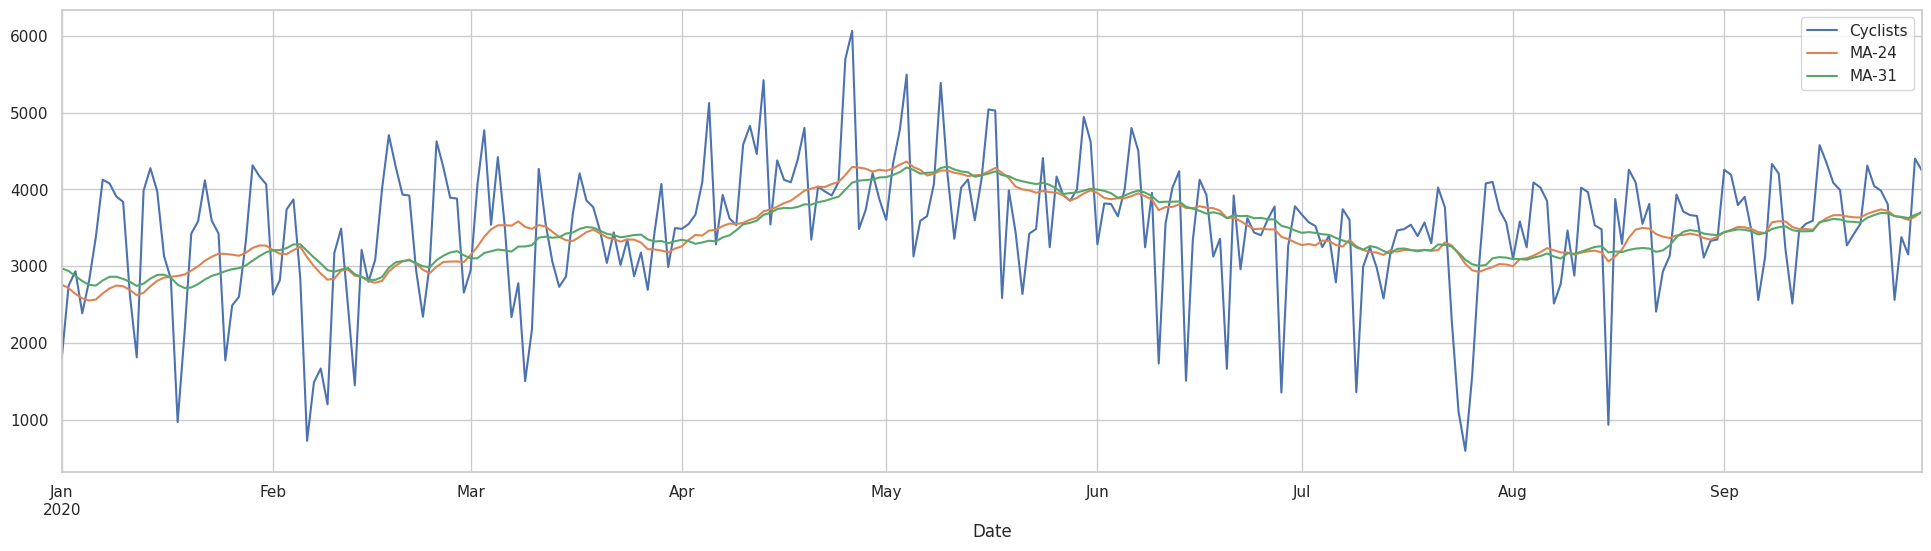

In [37]:
df_temp['2020-01-01':'2020-12-31'][['Cyclists','MA-24','MA-31']].plot(figsize=(24,6))

Looking at the above plots, the MA-31 looks to be the most viable moving average as it shows the seasonality trend of the dataset. 

### Calculate the de-trended series

<Axes: xlabel='Date'>

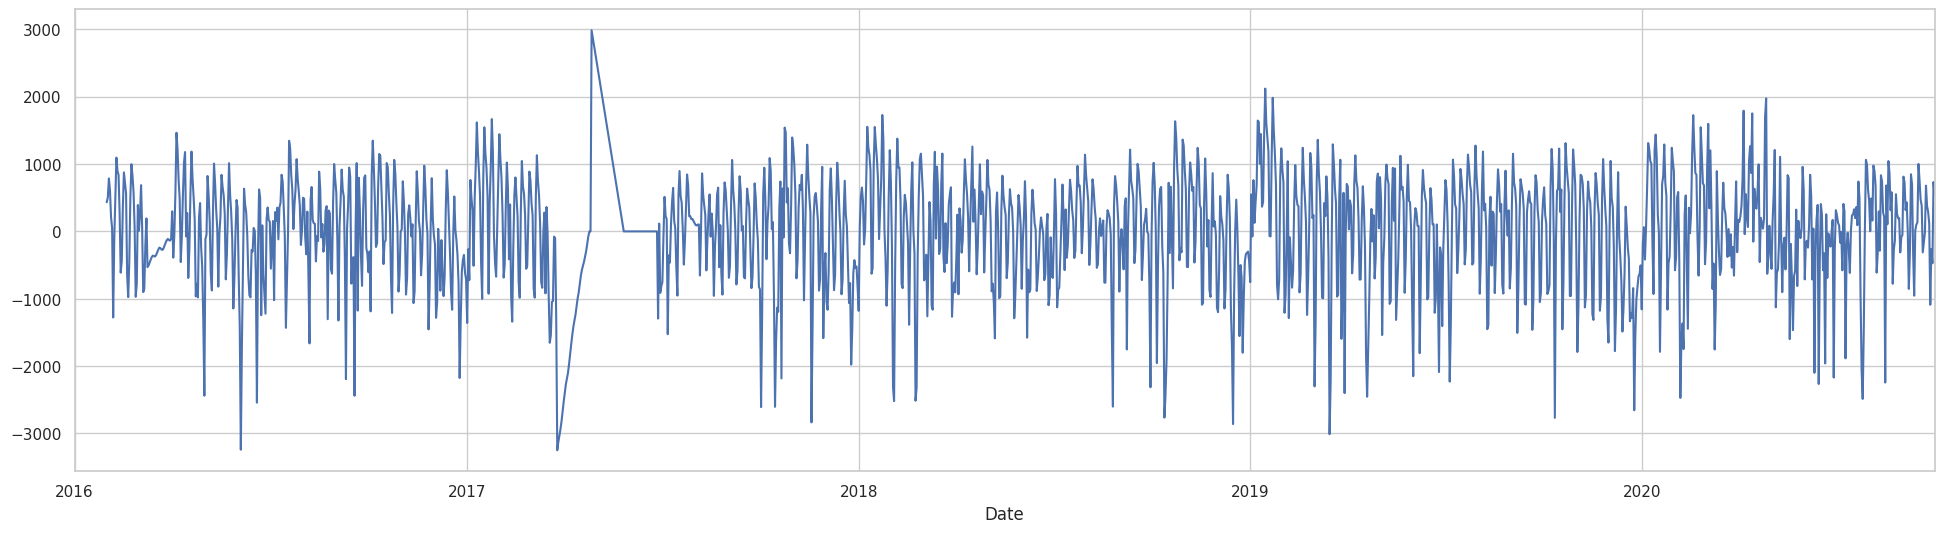

In [38]:
df_temp['Cyclists-detrended'] = df_temp['Cyclists'] - df_temp['MA-31']
df_temp['Cyclists-detrended'].plot(figsize=(24,6))

### Estimate the seasonal component

<Axes: xlabel='Date'>

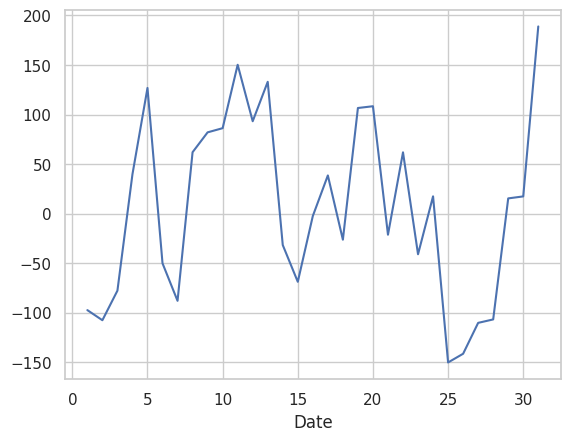

In [39]:
raw_daily_means = df_temp.groupby(df_temp.index.day)['Cyclists-detrended'].mean()
raw_daily_means.plot()

The seasonal component accounts for the MA-31, which means that in 31 days there seems to be consistent fluctuations for the number of cyclist traffic. There seems to be days where the traffic is low, this could be due to the weekends. 

<Axes: xlabel='Date'>

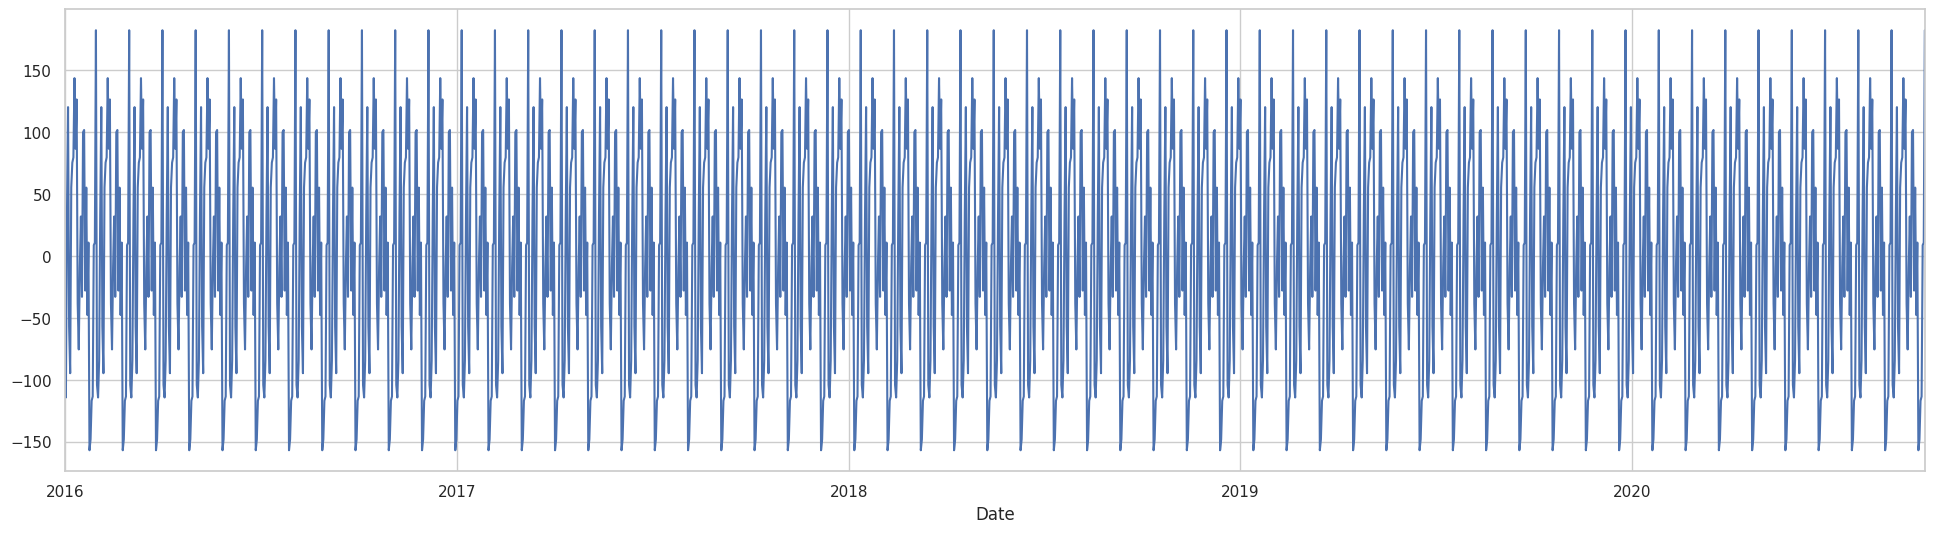

In [41]:
import numpy as np
# tile the values into the dataframe so that the entire series is filled
seasonal = np.tile(daily_means,int(np.floor(len(df_temp)/30.5)))

# used typeout to check lengths:
# len(seasonal), len(df_temp)
# Removing one observation
values_to_remove = np.array([2])
seasonal = np.delete(seasonal, values_to_remove)
df_temp['Cyclists-seasonal'] = seasonal
df_temp['Cyclists-seasonal'].plot(figsize=(24,6))

### Calculate the residual component

<Axes: xlabel='Date'>

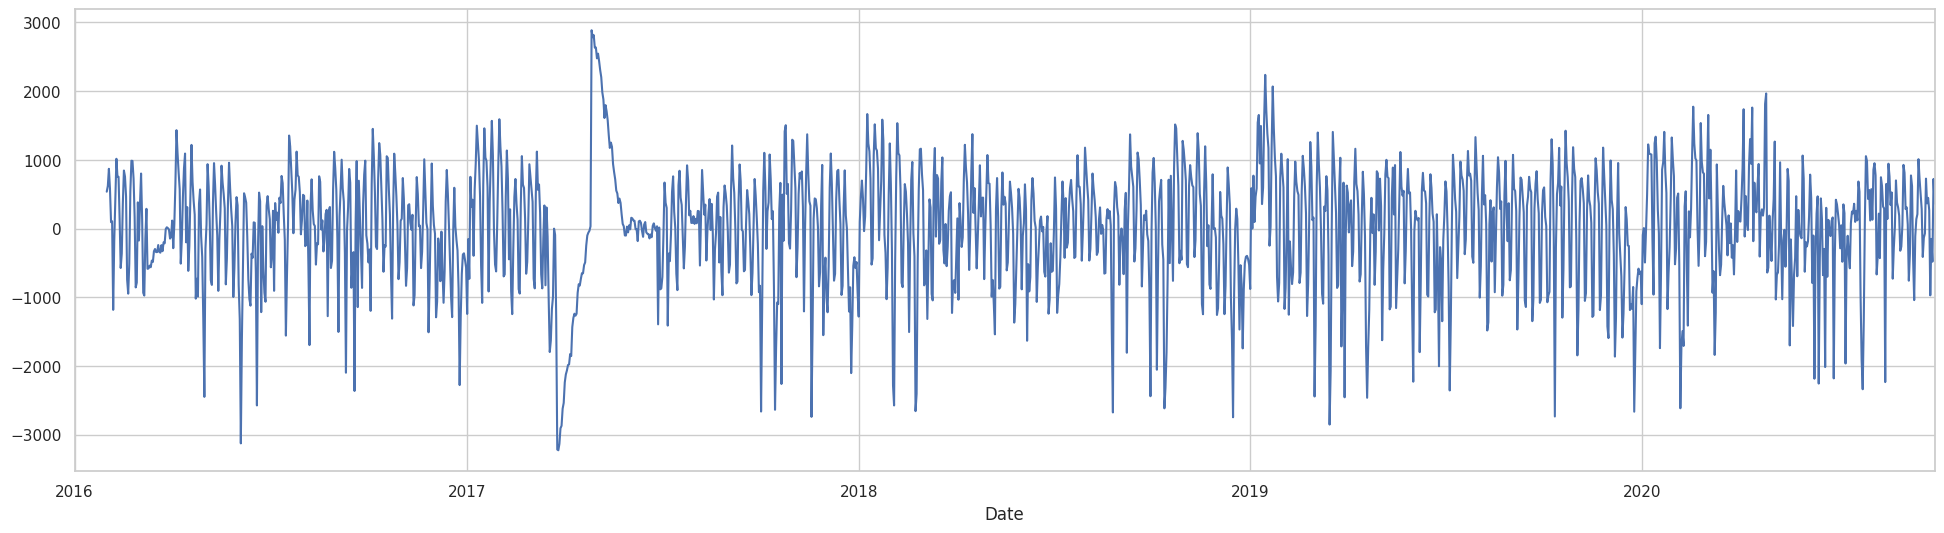

In [42]:
df_temp['Cyclists-residual'] = df_temp['Cyclists-detrended'] - df_temp['Cyclists-seasonal']
df_temp['Cyclists-residual'].plot(figsize=(24,6))

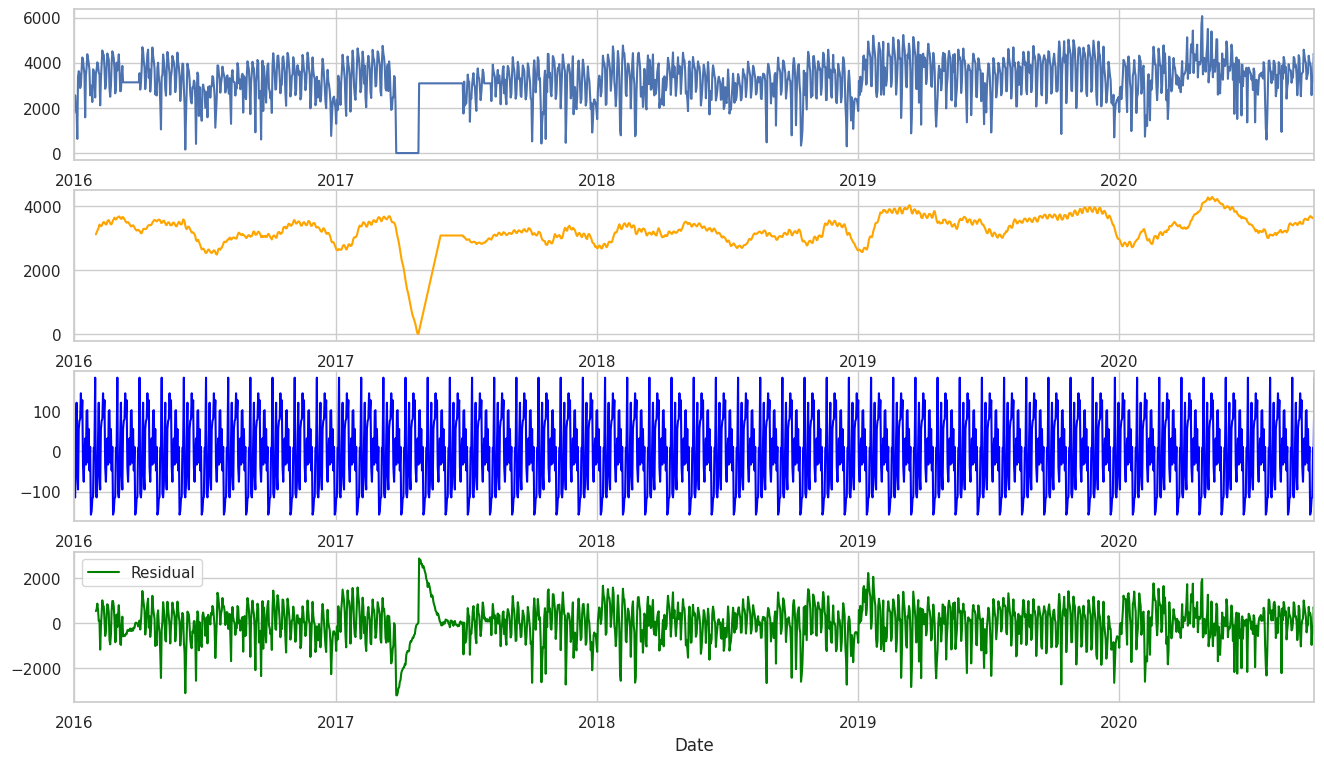

In [43]:
import matplotlib.pyplot as plt
fig, ax_str = plt.subplots(4)
df_temp['Cyclists'].plot(label='Original', ax=ax_str[0])
df_temp['MA-31'].plot(color='orange', label='MA-31 Trend', ax=ax_str[1])
df_temp['Cyclists-seasonal'].plot(color='blue', label='Seasonal', ax=ax_str[2])
df_temp['Cyclists-residual'].plot(color='green', label= 'Residual', ax=ax_str[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

When comparing the manual STR decomposition process against the automated modelling approach to validate the output of the manual process, it can be identified that there some differences to the automated approach however the trend and seasonal component seem to be following the same patterns.

Looking closer at the 2020 year.

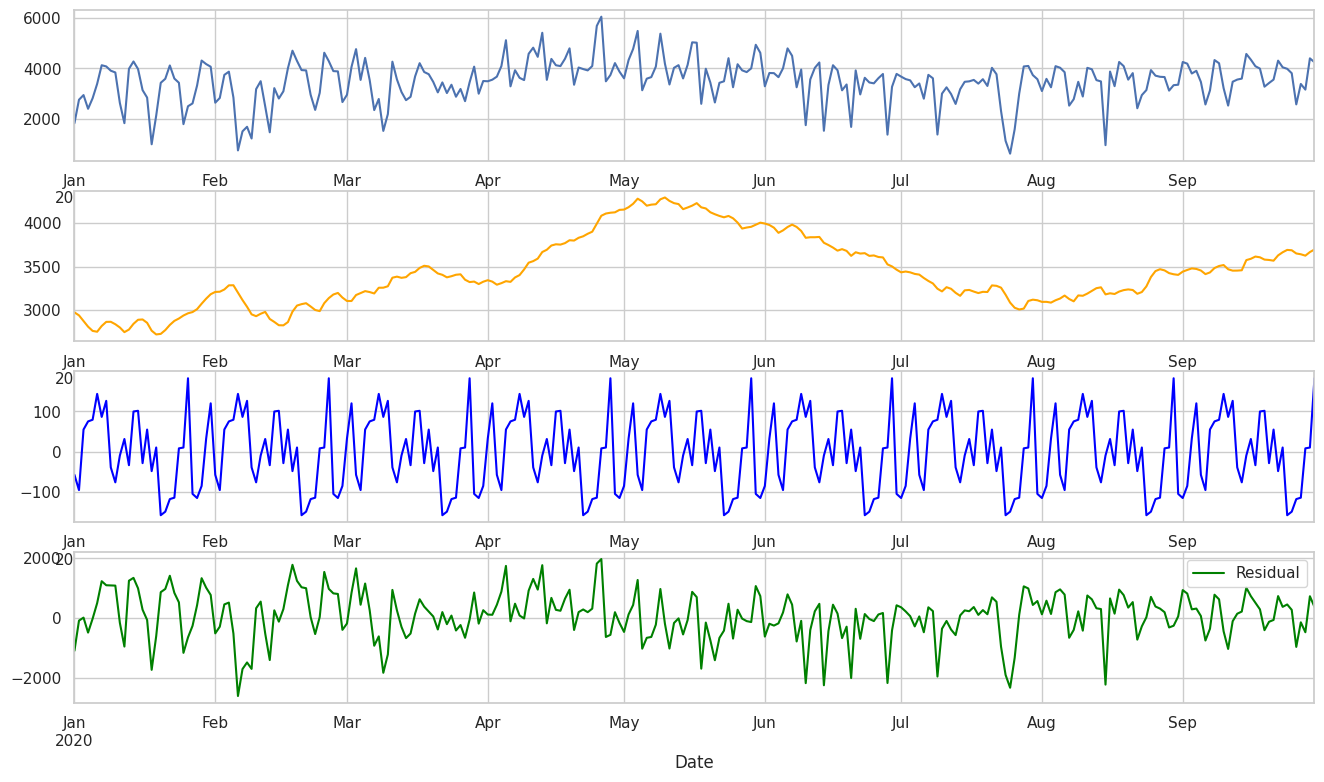

In [44]:
fig, ax_str_2 = plt.subplots(4)
df_temp['Cyclists']['2020-01-01':'2020-12-31'].plot(label='Original', ax=ax_str_2[0])
df_temp['MA-31']['2020-01-01':'2020-12-31'].plot(color='orange', label='MA-31 Trend', ax=ax_str_2[1])
df_temp['Cyclists-seasonal']['2020-01-01':'2020-12-31'].plot(color='blue', label='Seasonal', ax=ax_str_2[2])
df_temp['Cyclists-residual']['2020-01-01':'2020-12-31'].plot(color='green', label= 'Residual', ax=ax_str_2[3])
fig.set_size_inches((16, 9))
plt.legend()
plt.show()

## Task 4 - Timeseries models

Estimate the trend component using an ARIMA model. Will be fitting the ARIMA model for the trend-cycle component of your STR decomposition of the training data and interpret the estimated model parameters.

### ARIMA model 

<Axes: xlabel='Date'>

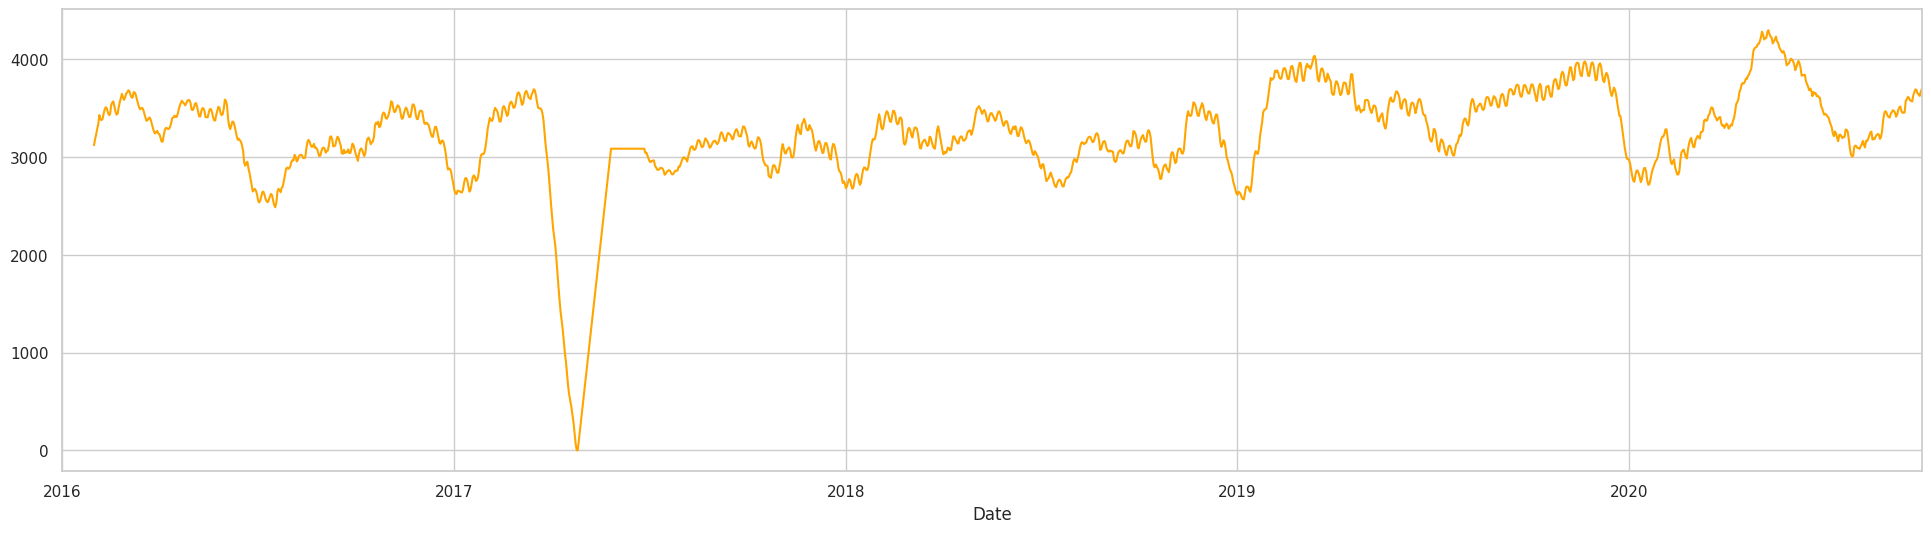

In [45]:
df_temp['MA-31'].plot(color='orange', figsize=(24,6))

To attempt to make the data stationary, we can difference it.

<Axes: xlabel='Date'>

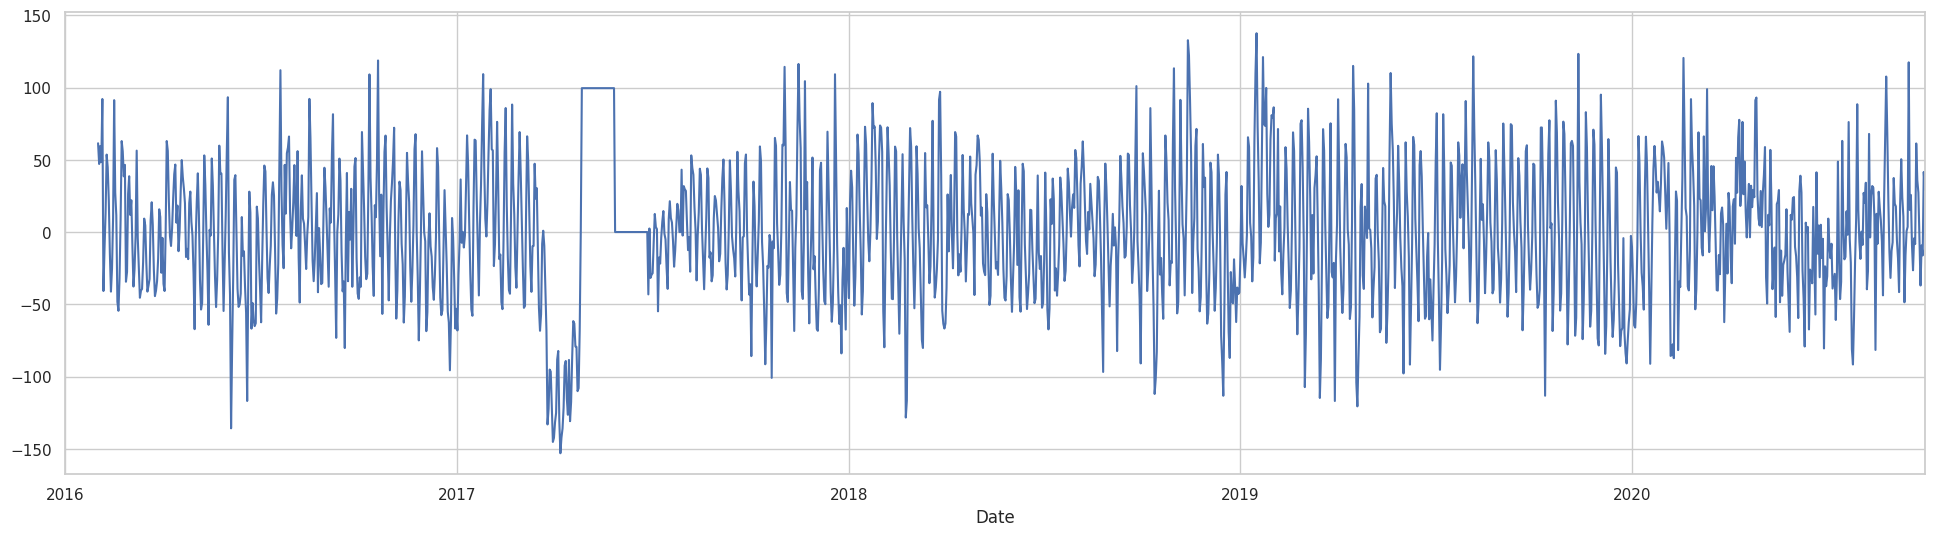

In [46]:
trend_d1 = df_temp['MA-31'].diff()
trend_d1.plot(figsize=(24,6))

This still contains lots of sub-series where the mean value moves up and down, and the variance (variability) is not constant throughout, so difference it again.

<Axes: xlabel='Date'>

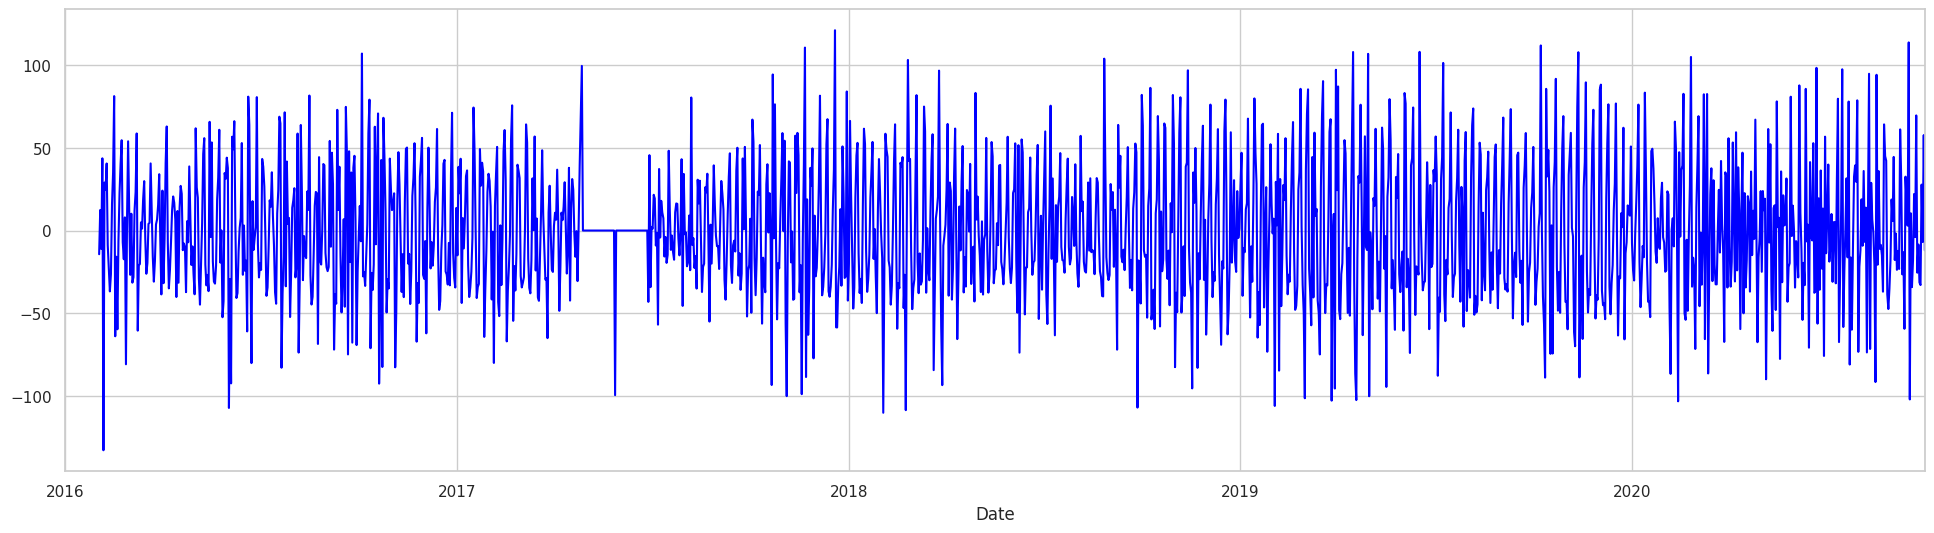

In [47]:
trend_d2 = trend_d1.diff()
trend_d2.plot(figsize=(24,6),color='blue',)

<Axes: xlabel='Date'>

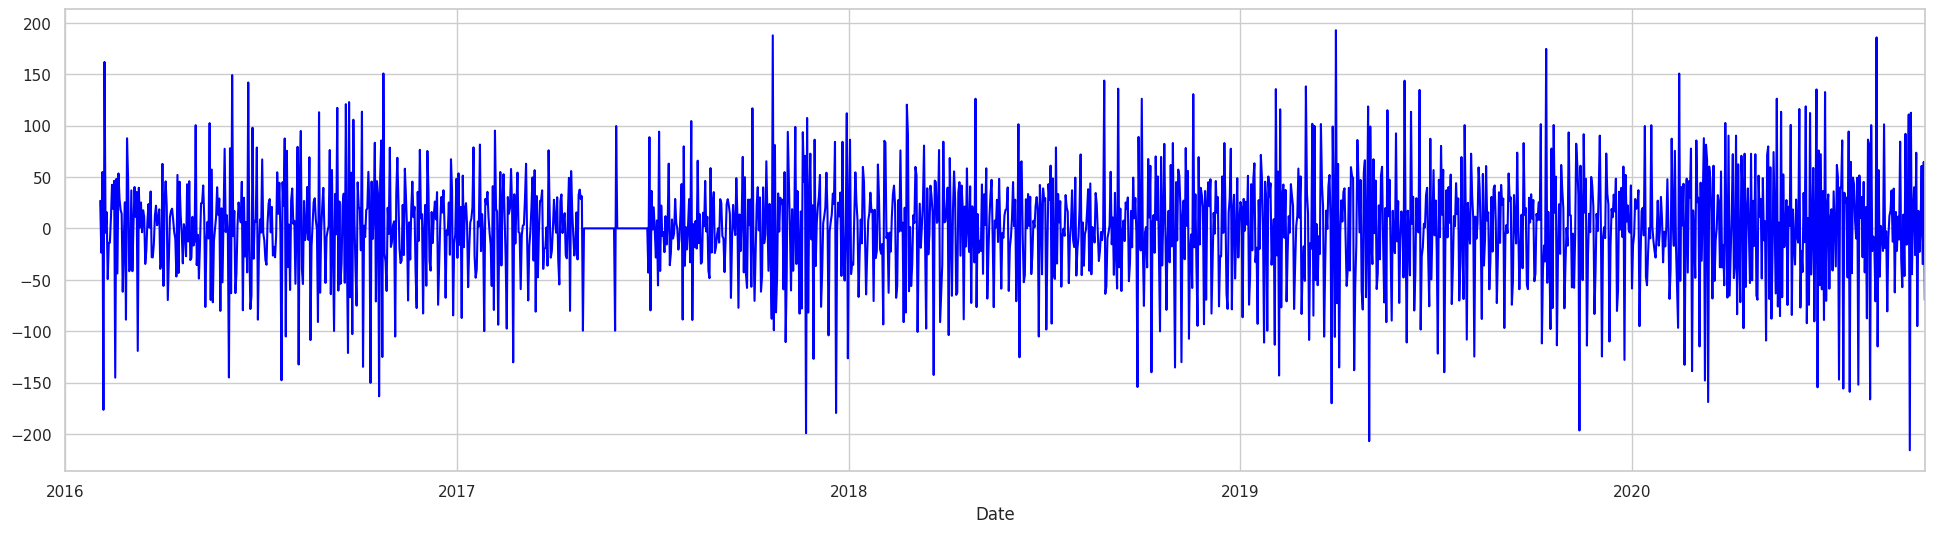

In [48]:
trend_d3 = trend_d2.diff()
trend_d3.plot(figsize=(24,6),color='blue',)

It is not perfect, but it is good enough for us to apply an ARIMA model to. 
Keep note that d=3.

Next we use the ARIMA fitting and analysis tools from StatsModels. 

In [49]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

Check if there is any evidence of autocorrelation in the data using the ACF and PCF plots (autocorrelation and partial autocorrelation

In [50]:
trend_d3 = trend_d3[31:]

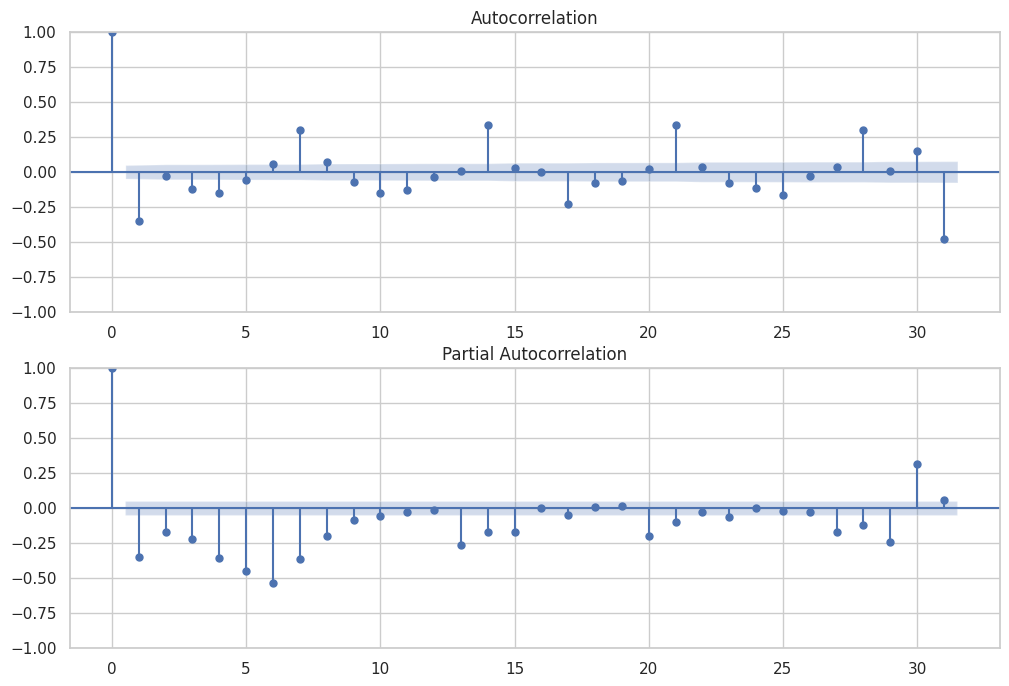

In [51]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d3[32:], lags=31, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d3[32:], lags=31, ax=ax2)

As an aside and for interest, also plot the first-difference of trend, to see the correlations evident in the first-differenced data:

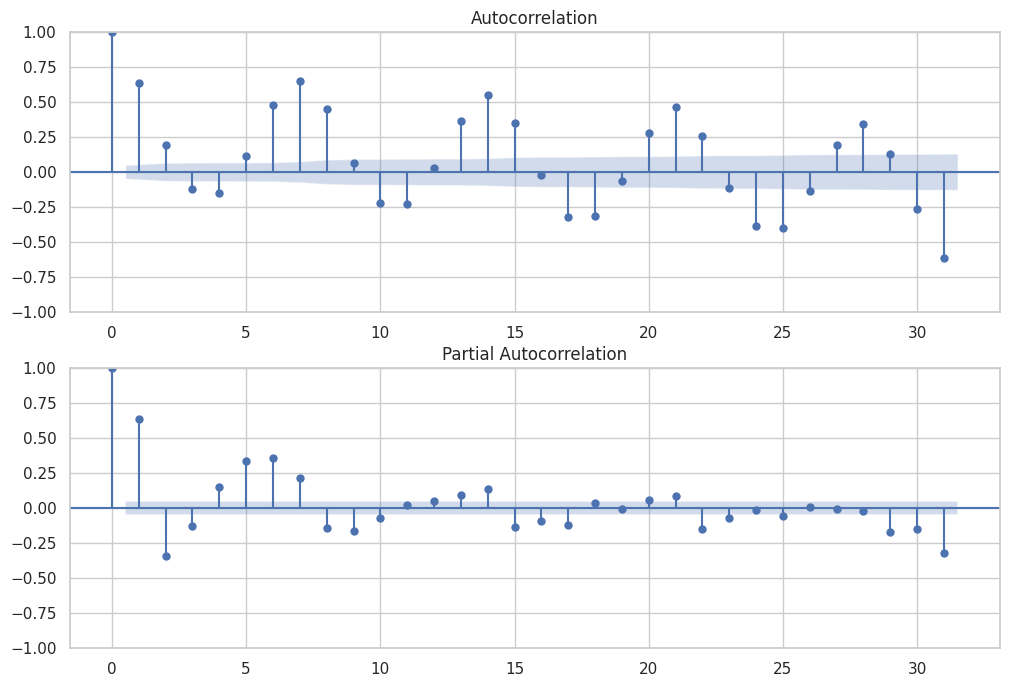

In [52]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend_d1[32:], lags=31, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend_d1[32:], lags=31, ax=ax2)

Now that the data has been made stationary, it can be modelled with an ARMA process. However, when using the software, it is best to use the full ARIMA model and set d=3 as determined above. This is a simple call to the ARIMA method in StatsModels, starting with p =1 and q=0.

In [53]:
arima_1_3_0 = ARIMA(df_temp['MA-31'], order=(1, 3, 0)).fit()
print(arima_1_3_0.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-31   No. Observations:                 1735
Model:                 ARIMA(1, 3, 0)   Log Likelihood               -9127.814
Date:                Fri, 27 Oct 2023   AIC                          18259.628
Time:                        01:28:04   BIC                          18270.542
Sample:                    01-01-2016   HQIC                         18263.664
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3543      0.023    -15.472      0.000      -0.399      -0.309
sigma2      2577.2388     82.709     31.160      0.000    2415.131    2739.346
Ljung-Box (L1) (Q):                   6.09   Jarque-

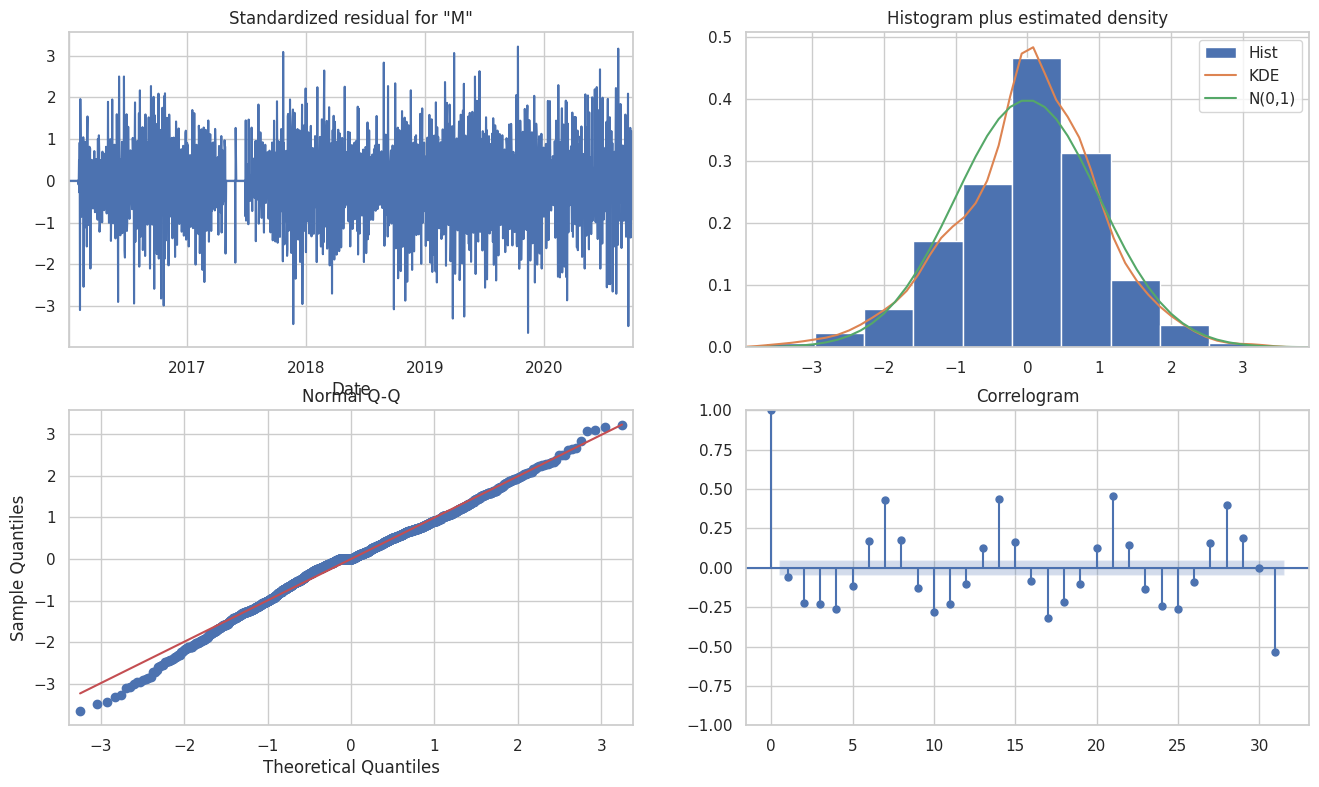

In [54]:
fig = plt.figure(figsize=(16, 9))
fig = arima_1_3_0.plot_diagnostics(fig=fig, lags=31)

Increase the AR lag parameter and re-fit:

In [55]:
arima_2_3_0 = ARIMA(df_temp['MA-31'], order=(2, 3, 0)).fit()
print(arima_2_3_0.summary())

                               SARIMAX Results                                
Dep. Variable:                  MA-31   No. Observations:                 1735
Model:                 ARIMA(2, 3, 0)   Log Likelihood               -9103.148
Date:                Fri, 27 Oct 2023   AIC                          18212.296
Time:                        01:28:06   BIC                          18228.667
Sample:                    01-01-2016   HQIC                         18218.351
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4138      0.024    -17.024      0.000      -0.461      -0.366
ar.L2         -0.1689      0.026     -6.482      0.000      -0.220      -0.118
sigma2      2508.9920     88.464     28.362      0.0

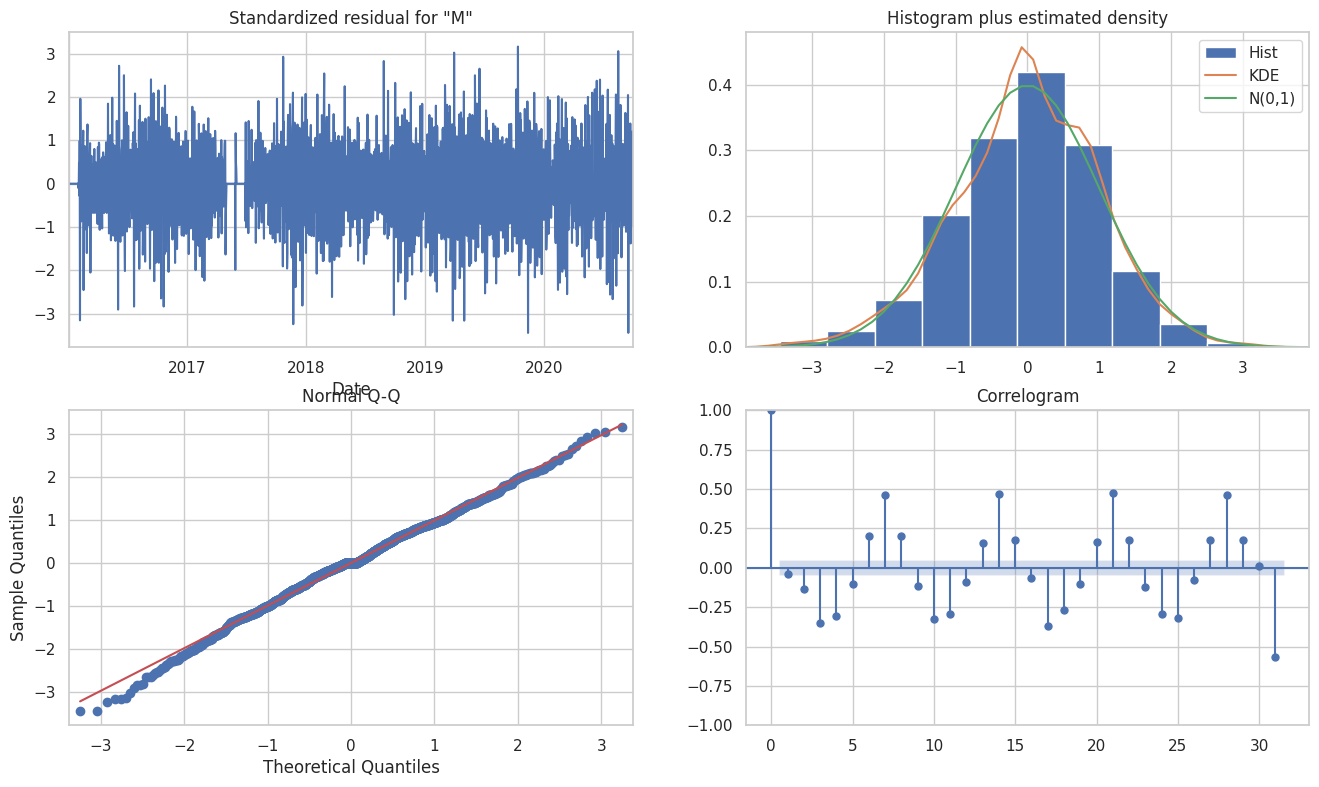

In [56]:
fig = plt.figure(figsize=(16, 9))
fig = arima_2_3_0.plot_diagnostics(fig=fig, lags=31)

Looking at the summary outputs, the AIC for ARIMA(1,2,0) is 19177.839, while for ARIMA(2,3,0) it is 19133.617. A similar change is observed in the BIC. Lower AIC and BIC scores are preferred, so this is encouragement to look for further improvements.

In [57]:
arima_2_3_1 = ARIMA(df_temp['MA-31'], order=(2, 3, 1)).fit()
print(arima_2_3_1.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  MA-31   No. Observations:                 1735
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -8703.094
Date:                Fri, 27 Oct 2023   AIC                          17414.187
Time:                        01:28:07   BIC                          17436.015
Sample:                    01-01-2016   HQIC                         17422.260
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1135      0.024      4.692      0.000       0.066       0.161
ar.L2         -0.1791      0.025     -7.045      0.000      -0.229      -0.129
ma.L1         -0.9994      0.039    -25.714      0.0

The AIC has continued to drop, now with a score of 18331.153 for the ARIMA(2,3,1) model, down from 19133.617 for ARIMA(2,3,0).

### Forecasting with ARIMA

In [58]:
arima_fcst = arima_2_3_1.get_forecast(steps=31)
arima_predictions = pd.DataFrame(arima_fcst.predicted_mean)
arima_predictions.rename(columns={"predicted_mean": "trend"}, inplace=True)

Plot the mean trend prediction.

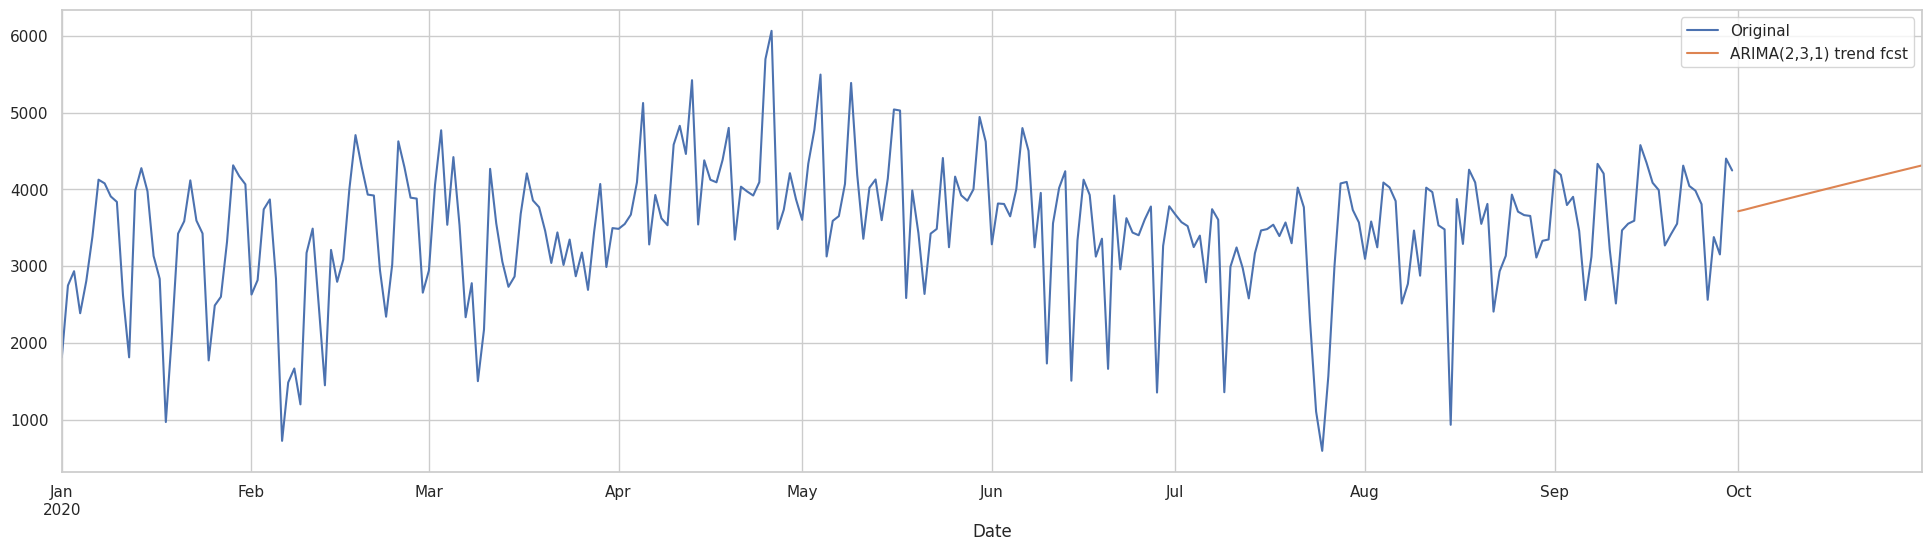

In [60]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2020-01-01":"2020-09-30"]['Cyclists'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(2,3,1) trend fcst", ax=ax_arima_fcst)
plt.legend()

Adding seasonality back into the forecasts.

In [61]:
arima_predictions['seasonal'] = daily_means.tolist()
arima_predictions.head()

trend    seasonal
2020-10-01  3715.615302 -104.075651
2020-10-02  3734.196414 -114.278416
2020-10-03  3754.923632  -84.421849
2020-10-04  3775.712569   33.072390
2020-10-05  3796.080578  120.174925

In [62]:
arima_predictions['trend+seasonal'] = arima_predictions['trend'] + arima_predictions['seasonal']
arima_predictions.head()

trend    seasonal  trend+seasonal
2020-10-01  3715.615302 -104.075651     3611.539651
2020-10-02  3734.196414 -114.278416     3619.917998
2020-10-03  3754.923632  -84.421849     3670.501783
2020-10-04  3775.712569   33.072390     3808.784959
2020-10-05  3796.080578  120.174925     3916.255503

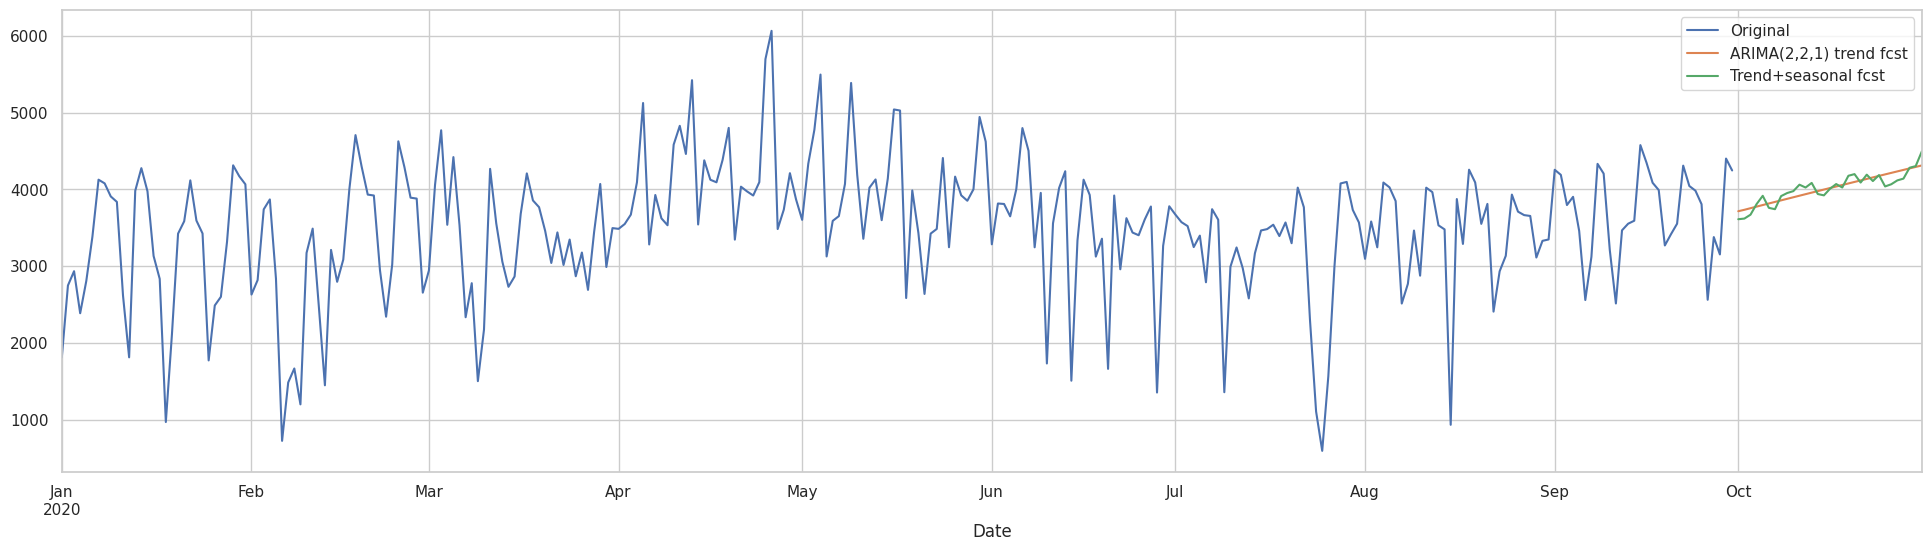

In [63]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2020-01-01":"2020-09-30"]['Cyclists'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend'].plot(label="ARIMA(2,2,1) trend fcst", ax=ax_arima_fcst)
arima_predictions['trend+seasonal'].plot(label="Trend+seasonal fcst", ax=ax_arima_fcst)
plt.legend()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['label']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


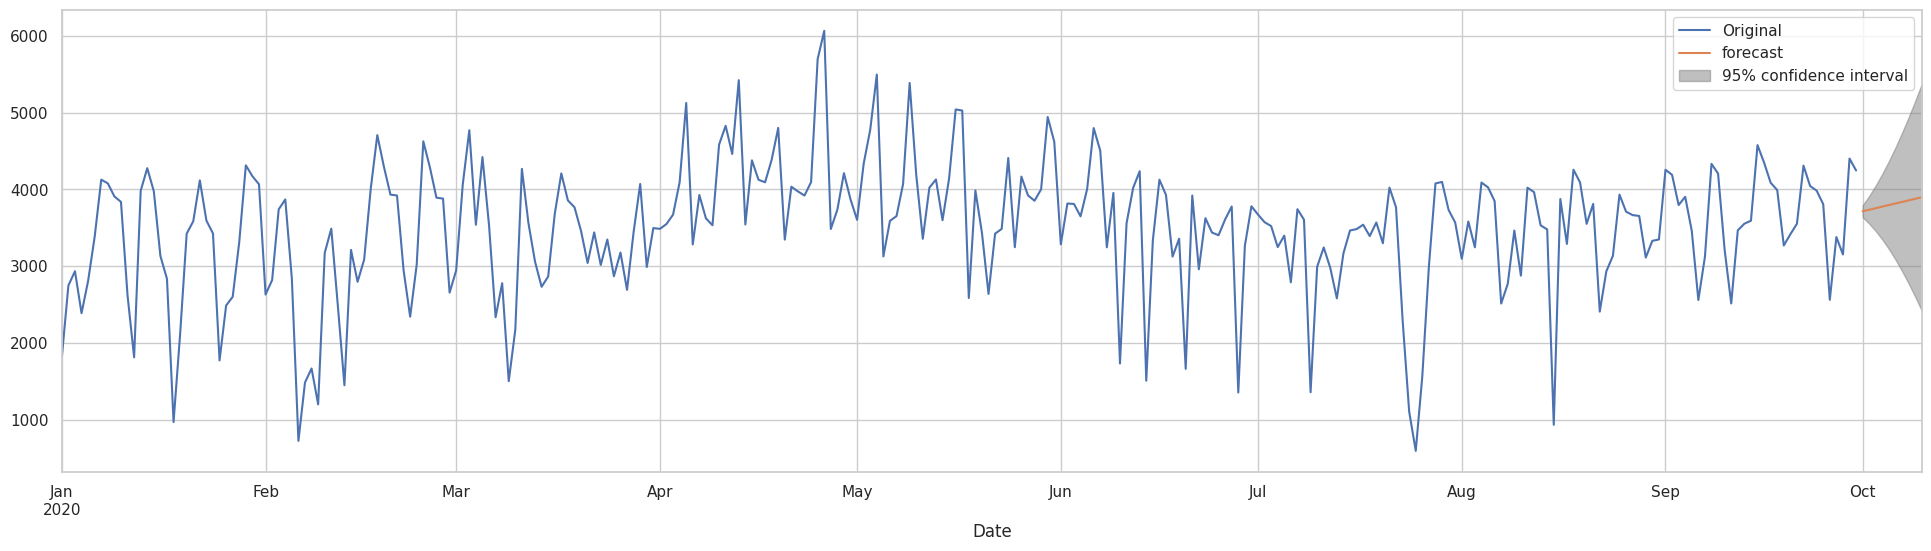

In [64]:
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2020-01-01":"2020-09-30"]['Cyclists'].plot(label='Original', ax=ax_arima_fcst)
fig = plot_predict(arima_2_3_1, start="2020-10-01", end="2020-10-10", label='ARIMA(2,2,1) Forecast', ax=ax_arima_fcst)

In [65]:
arima_fcst.conf_int().head()

lower MA-31  upper MA-31
2020-10-01  3638.110816  3793.119788
2020-10-02  3552.925477  3915.467351
2020-10-03  3456.218637  4053.628627
2020-10-04  3346.671770  4204.753367
2020-10-05  3222.581720  4369.579435

In [66]:
arima_predictions = pd.concat([arima_predictions,arima_fcst.conf_int()], axis = 1)
arima_predictions.rename(columns={"lower MA-31": "trend lower CI", "upper MA-31": "trend upper CI"}, inplace=True)
arima_predictions["seasonal lower CI"] = arima_predictions["trend lower CI"] + arima_predictions['seasonal']
arima_predictions["seasonal upper CI"] = arima_predictions["trend upper CI"] + arima_predictions['seasonal']
arima_predictions.head()

trend    seasonal  trend+seasonal  trend lower CI  \
2020-10-01  3715.615302 -104.075651     3611.539651     3638.110816   
2020-10-02  3734.196414 -114.278416     3619.917998     3552.925477   
2020-10-03  3754.923632  -84.421849     3670.501783     3456.218637   
2020-10-04  3775.712569   33.072390     3808.784959     3346.671770   
2020-10-05  3796.080578  120.174925     3916.255503     3222.581720   

            trend upper CI  seasonal lower CI  seasonal upper CI  
2020-10-01     3793.119788        3534.035165        3689.044137  
2020-10-02     3915.467351        3438.647061        3801.188935  
2020-10-03     4053.628627        3371.796788        3969.206778  
2020-10-04     4204.753367        3379.744161        4237.825758  
2020-10-05     4369.579435        3342.756645        4489.754360

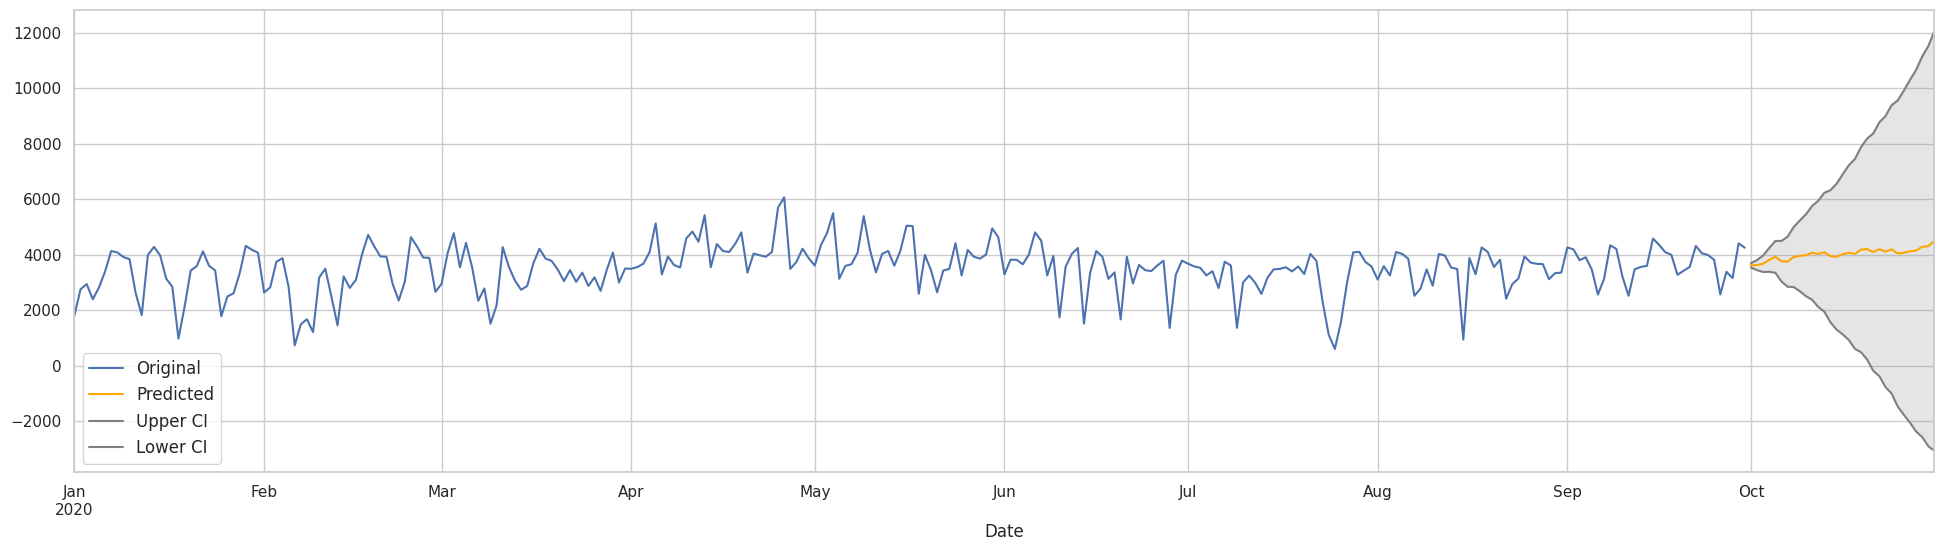

In [67]:
x = arima_predictions.index.values
fig, ax_arima_fcst = plt.subplots(figsize=(24,6))
df_temp["2020-01-01":"2020-09-30"]['Cyclists'].plot(label='Original', ax=ax_arima_fcst)
arima_predictions['trend+seasonal'].plot(color = 'orange',label = 'Predicted' )
arima_predictions['seasonal upper CI'].plot(color = 'grey', label = 'Upper CI')
arima_predictions['seasonal lower CI'].plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)

# fill between the conf intervals
plt.fill_between(x, arima_predictions['seasonal lower CI'], arima_predictions['seasonal upper CI'], color='grey', alpha=0.2)

The estimated parameters for the ARIMA model,

- <i>p</i>: the AR (autoregressive) lag order
- <i>d</i>: the integration degree (or number of differences), and 
- <i>q</i>: the MA (moving averages) window length.

The ARIMA model with p=2, d=2 and q=1 was used to produce the forecast. The AR lag order was chosen to be value 2 which means it uses the last 2 observations for the current input after differencing the data 3 times and considering 1 past forecast error in the prediction. 

## Task 5 - Pure forecasters

An appropriate pure forecasting method will be used to predict the trend component of
the cycle traffic training data.

A feed-foward neural network will be used for timeseries prediction.

In [68]:
data = pd.concat([training_data['Bicentennial Bikeway Cyclists'], 
                 training_data['Bicentennial Bikeway Cyclists'].shift(), 
                 training_data['Bicentennial Bikeway Cyclists'].shift(2),
                 training_data['Bicentennial Bikeway Cyclists'].shift(3),
                 training_data['Bicentennial Bikeway Cyclists'].shift(4)], 
                 axis=1
                 ).dropna()


data2 = pd.concat([testing_data['Bicentennial Bikeway Cyclists'], 
                 testing_data['Bicentennial Bikeway Cyclists'].shift(), 
                 testing_data['Bicentennial Bikeway Cyclists'].shift(2),
                 testing_data['Bicentennial Bikeway Cyclists'].shift(3),
                 testing_data['Bicentennial Bikeway Cyclists'].shift(4)], 
                 axis=1
                 ).dropna()

In [69]:
train = np.array(data)

test = np.array(data2)

In [70]:
# Scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# training data
y_train = train_scaled[:,0]
X_train = train_scaled[:,1:]

# test data
y_test = test_scaled[:,0]
X_test = test_scaled[:,1:]

In [71]:
from tensorflow import keras

2023-10-27 01:28:09.837495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 01:28:09.932961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 01:28:09.934786: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 01:28:10.851400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


These parameters are required to compile the model

In [72]:
# Configure model
learning_rate = 0.001 # NN weight update rates

We will use the following high-level Keras commands to configure a single-layer feed-forward network:

- keras.layers.Input()
- keras.layers.Dense()
- keras.layers.Output()
- keras.Model

In [73]:
def slff_relu(input_dim,hidden_1_dim = 64):
    # Single-layer FF network with Rectified linear unit (relu) activation fxn
    inputs = keras.layers.Input(shape=(input_dim))
    hidden_layer_1 = keras.layers.Dense(hidden_1_dim, activation='relu')(inputs)
    outputs = keras.layers.Dense(1,activation='tanh')(hidden_layer_1)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [74]:
## typeout block below to prevent retraining
input_dim = 4 # equal to the number of lagged variables
model = slff_relu(input_dim)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Fit
model.fit(X_train, y_train, epochs=100, batch_size=20, shuffle=False)

Epoch 1/100


2023-10-27 01:28:11.969588: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27696 exceeds 10% of free system memory.
2023-10-27 01:28:12.050264: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency
2023-10-27 01:28:12.056391: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13848 exceeds 10% of free system memory.
2023-10-27 01:28:12.056450: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13848 exceeds 10% of free system memory.
2023-10-27 01:28:12.056569: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13848 exceeds 10% of free system memory.


87/87 [==============================] - 1s 930us/step - loss: 0.0812
Epoch 2/100
87/87 [==============================] - 0s 712us/step - loss: 0.0166
Epoch 3/100
87/87 [==============================] - 0s 709us/step - loss: 0.0154
Epoch 4/100
87/87 [==============================] - 0s 691us/step - loss: 0.0147
Epoch 5/100
87/87 [==============================] - 0s 703us/step - loss: 0.0143
Epoch 6/100
87/87 [==============================] - 0s 692us/step - loss: 0.0140
Epoch 7/100
87/87 [==============================] - 0s 700us/step - loss: 0.0137
Epoch 8/100
87/87 [==============================] - 0s 690us/step - loss: 0.0134
Epoch 9/100
87/87 [==============================] - 0s 716us/step - loss: 0.0132
Epoch 10/100
87/87 [==============================] - 0s 721us/step - loss: 0.0131
Epoch 11/100
87/87 [==============================] - 0s 726us/step - loss: 0.0129
Epoch 12/100
87/87 [==============================] - 0s 729us/step - loss: 0.0128
Epoch 13/100
87/87 [=====

Now that you have trained the neural network, you can use it to forecast cyclist traffic. 

Start by generating the one-step predictions for the test data, using the predict() method.

In [76]:
# Predict
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


2023-10-27 01:28:18.850098: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 8192 exceeds 10% of free system memory.


Plot the last few elements of the one-step predictions.

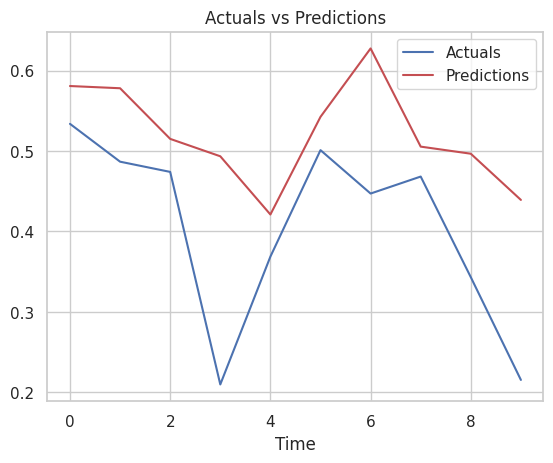

In [77]:
# Plot test data predictions
def plot_pred(y_test,y_pred,period=10):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_pred[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

To get a sense of the goodness of these predictions, we compute and plot the test data errors

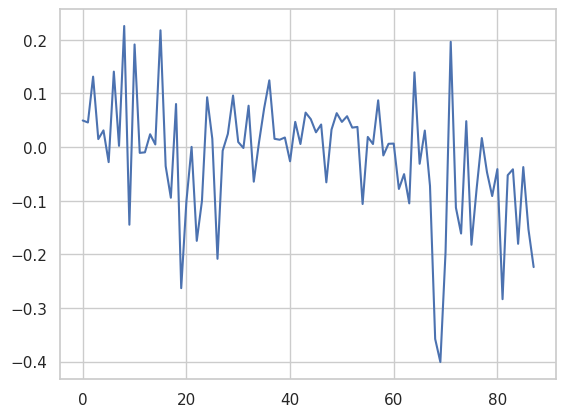

In [78]:
# Compute and plot the test data errors
errors = np.squeeze(y_test) - np.squeeze(y_pred)
plt.plot(errors)

### Multi-step preditctions to predict the trend component

In [79]:
def multistep_prediction(H, model, X_pred,residuals=[]):
    # Initialise lists for storing multi-step predictions
    y_pred_multi = []
    X_pred_multi = []

    for t in range(H):
        # get next prediction
        X_pred = np.array(X_pred.reshape(1,len(X_pred)))
        new_y= float(model.predict(X_pred))
        # print("new_y")
        # print(new_y)
    
        # update 
        y_pred_multi.append(float(new_y))
        X_pred_multi.append(list(X_pred[0])) 
        # print("y_pred_multi")
        # print(y_pred_multi)
        # print("X_pred_multi")
        # print(X_pred_multi)
    
        # prepare net input with bootstrapped training residuals
        X_pred = X_pred_multi[t][:-1]
        if len(residuals) == 0:
            X_pred.insert(0,new_y)
        else:
            X_pred.insert(0,(new_y+np.random.choice(residuals)))
        X_pred = np.array(X_pred)
        # print("new X")
        # print(X_pred)
        
    return y_pred_multi, X_pred_multi

Now generate the multistep prediction:

1/1 [==============================] - 0s 31ms/step


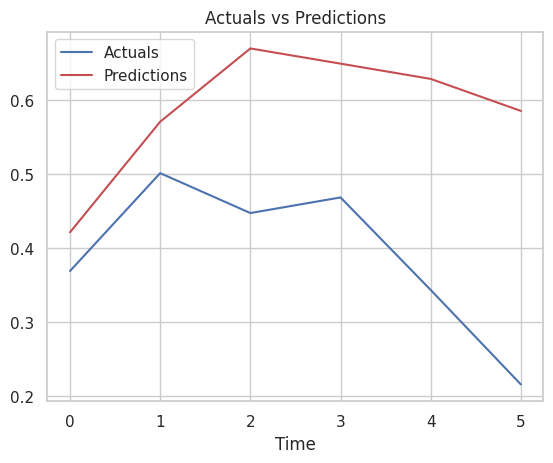

In [80]:
# Prediction horizon
H = 6

X_test_multi = X_test[-H:,:]
y_test_multi = y_test[-H:]
# y_pred_multi = model.predict(X_test_multi)    
# plot_pred(y_test_multi,y_pred_multi)

# Prepare first input to multistep prediction loop
X_pred = X_test_multi[0,:]

# Multistep prediction
y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred)
plot_pred(y_test_multi, y_pred_multi)

### Bootstrap for interval prediction

In [81]:
residuals = np.squeeze(y_train) - np.squeeze(model.predict(X_train))

55/55 [==============================] - 0s 551us/step


In [82]:
# Bootstrap iterations
K = 100

# Prepare first input to multistep bootsrtap loop
X_pred = X_test_multi[0,:]
y_pred_bootstrap = []

# Use multistep prediction to generate bootstrap data, 
# List of training residuals to sample from passed in as fourth argument 

for k in range(K):
    y_pred_multi, X_pred_multi = multistep_prediction(H,model,X_pred,residuals)
    y_pred_bootstrap.append(y_pred_multi)
    # store y predictions

1/1 [==============================] - 0s 32ms/step


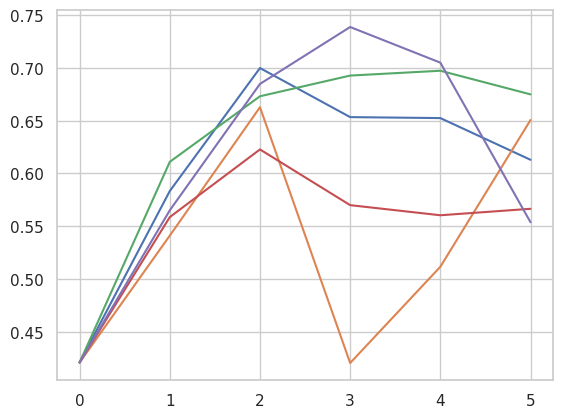

In [83]:
# Useful utility method for transposing lists of lists    
def transposed_2d_list(l):
    return [[row[i] for row in l] for i in range(len(l[0]))]    

plt.plot(transposed_2d_list(y_pred_bootstrap[-5:]))

Second, we can analyse the bootstrapped data to compute various percentiles (quantiles). In the code below, the percentile data is generated using np.percentiles(), and then stored in a dataframe, to keep it tidy and easy to plot.  

In [84]:
bootstrap_predictions = pd.DataFrame(index = data.index.values[-H:])

for pctl in range(0,101,10):
    bootstrap_predictions[str(pctl)] = np.percentile(y_pred_bootstrap,pctl,axis=0)

bootstrap_predictions.rename(columns={'50': "median"}, inplace=True)
bootstrap_predictions['actuals'] = y_test[-H:]

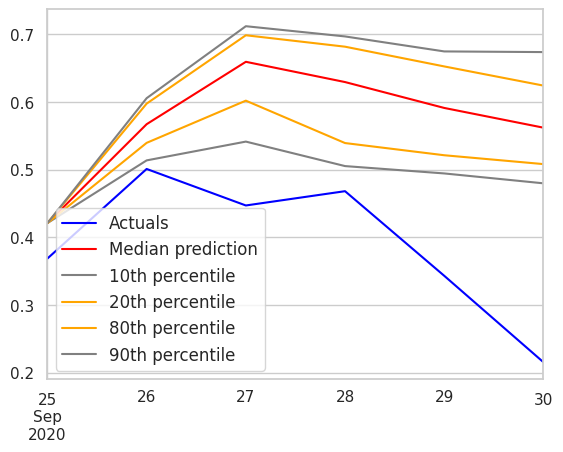

In [85]:
# plot some deciles
fig, ax_bootstrap_2 = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap_2)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap_2 )
bootstrap_predictions['10'].plot(color = 'grey',label = '10th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['20'].plot(color = 'orange',label = '20th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['80'].plot(color = 'orange',label = '80th percentile', axes=ax_bootstrap_2 )
bootstrap_predictions['90'].plot(color = 'grey',label = '90th percentile', axes=ax_bootstrap_2 )
plt.legend(loc = 'lower left', fontsize = 12)

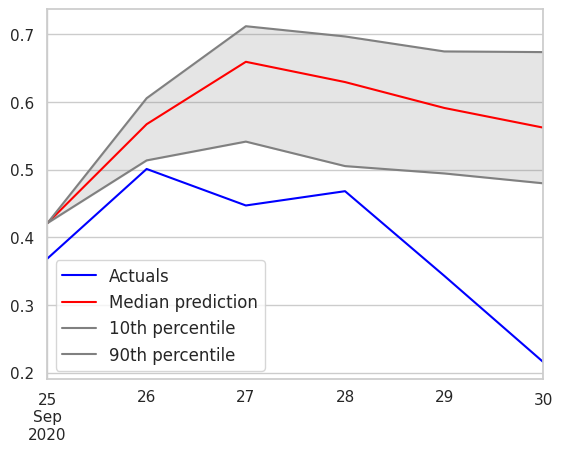

In [86]:
# plot interval with fill
fig, ax_bootstrap = plt.subplots()
bootstrap_predictions['actuals'].plot(color = 'blue', label='Actuals', axes=ax_bootstrap)
bootstrap_predictions['median'].plot(color = 'red',label = 'Median prediction', axes=ax_bootstrap )
bootstrap_predictions['10'].plot(color = 'grey', label = '10th percentile', axes=ax_bootstrap )
bootstrap_predictions['90'].plot(color = 'grey', label = '90th percentile', axes=ax_bootstrap )
plt.legend(loc = 'lower left', fontsize = 12)

x = data.index.values[-H:]
plt.fill_between(x, bootstrap_predictions['10'], bootstrap_predictions['90'], color='grey', alpha=0.2)

### Pure forecast with seasonal component

In [121]:
#Rescale y_pred

y_pred_original = scaler.inverse_transform(np.column_stack((y_pred, X_test)))

num_lags = 5

# Remove the first 'num_lags' rows to get predictions for original time steps
y_predictions_original = y_predictions[num_lags:]

# Reset the index of the DataFrame if needed
y_predictions_original = y_predictions_original.reset_index(drop=True)

y_predictions_final = y_predictions_original.iloc[:, 0]

In [128]:
y_predictions = pd.DataFrame(y_predictions_final)
y_predictions.rename(columns={0: "trend"}, inplace=True)

In [156]:
seasonal = daily_means.tolist() * 3

values_to_remove = np.array([2, 3, 5, 6 ,12, 14, 16, 17, 19, 20])
seasonal = np.delete(seasonal, values_to_remove)
y_predictions['seasonal'] = seasonal

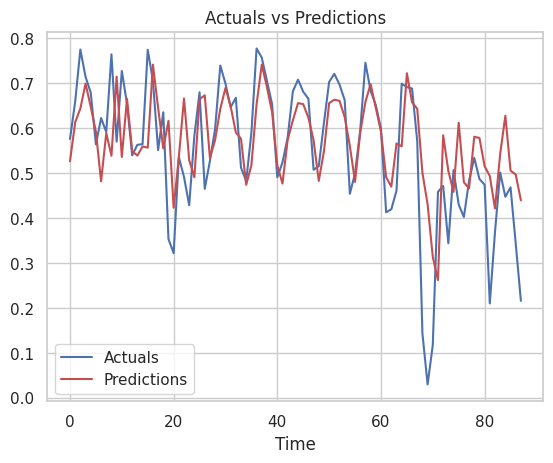

In [175]:
# Plot test data predictions
def plot_pred(y_test,y_predictions,period=100):
    plt.figure()
    plt.plot(y_test[-period:], "b", label="Actuals")
    plt.plot(y_predictions[-period:], "r", label="Predictions")
    plt.title("Actuals vs Predictions")
    plt.xlabel("Time")
    plt.legend()
    plt.show()

plot_pred(y_test,y_pred)

The above shows the predicted data in comparison to the actual data for the last 3 months of the for the trend component found by the neural network in addition to the seasonal component estimated in Task 3. 

## Task 6 - Evaluation of the forecast performace

In [176]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def rmse(y_true,y_pred):
    return mse(y_true,y_pred)**(0.5)

Evaluate one-step predictions:

In [177]:
mae(y_test, y_pred)

0.0821750280875939

In [178]:
rmse(y_test, y_pred)  

0.11564389235273155

Evaluate multistep predictions:

In [180]:
mae(bootstrap_predictions['actuals'],bootstrap_predictions['median'])

0.18107963672858207

Comparing the Neural Network and ARIMA models, the Neural Network proved to be a better forecasting model for the dataset given. This is due to the differences between the models, where the neural network model handles non-stationary data without differencing (which is required in ARIMA model), and works better for noisy and irregularly sampled data. In addition, the ARIMA model use a linear comibination of lagged observations and moving average terms to forecast predictions, whereas neural networks are a machine learning technique which uses interconnected layers to capture patterns and trends in the data. For this dataset, the neural network model was able to use the previous data points to predict the next value better than the ARIMA model. 

### Future forecast improvement

In order to improve the accuracy and reliability of the forecast, the missing values in the 2016 and 2017 years could have been handled better as instead of just filling them in based off the 2018 year for the time periods missing, the model itself could have been used to predict the missing data. Also more data from prior years can be used to improve the forecast. An exogenous variable that could have been used to better understand the data and check for correlation would be the weather data as this can lead to a direct impact on the cyclist traffic. 